In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [3]:
# Core data manipulation and numerical computing
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn preprocessing
from sklearn.preprocessing import (StandardScaler, LabelEncoder,
                                   PolynomialFeatures, MinMaxScaler)

# Scikit-learn model selection
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     GridSearchCV, StratifiedKFold)

# Scikit-learn feature selection
from sklearn.feature_selection import (SelectKBest, f_classif, RFE,
                                       mutual_info_classif, RFECV,
                                       VarianceThreshold, chi2)

# Scikit-learn metrics
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve,
                            precision_recall_curve, average_precision_score)

# Machine Learning Models
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier,
                              VotingClassifier, BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# XGBoost
try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except ImportError:
    print("⚠️  XGBoost not available. Install with: pip install xgboost")
    XGBOOST_AVAILABLE = False

# LightGBM
try:
    from lightgbm import LGBMClassifier
    LIGHTGBM_AVAILABLE = True
except ImportError:
    print("⚠️  LightGBM not available. Install with: pip install lightgbm")
    LIGHTGBM_AVAILABLE = False

# CatBoost
try:
    from catboost import CatBoostClassifier
    CATBOOST_AVAILABLE = True
except ImportError:
    print("⚠️  CatBoost not available. Install with: pip install catboost")
    CATBOOST_AVAILABLE = False

# Warnings and display settings
import warnings
warnings.filterwarnings('ignore')

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)

# Matplotlib settings
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("="*90)
print("🌊 CLIMATRACK: WATERBORNE DISEASE RISK PREDICTION SYSTEM")
print("="*90)
print("Advanced Feature Engineering Pipeline with 50,000 Samples")
print("Author: Chukwuonye Justice Izuchukwu")
print("="*90)
print(f"\n✅ All libraries imported successfully!")
print(f"✅ Random seed set to: {RANDOM_SEED}")
print(f"✅ XGBoost available: {XGBOOST_AVAILABLE}")
print(f"✅ LightGBM available: {LIGHTGBM_AVAILABLE}")
print(f"✅ CatBoost available: {CATBOOST_AVAILABLE}")
print(f"\n{'='*90}\n")

🌊 CLIMATRACK: WATERBORNE DISEASE RISK PREDICTION SYSTEM
Advanced Feature Engineering Pipeline with 50,000 Samples
Author: Chukwuonye Justice Izuchukwu

✅ All libraries imported successfully!
✅ Random seed set to: 42
✅ XGBoost available: True
✅ LightGBM available: True
✅ CatBoost available: True




In [6]:
import pandas as pd

df = pd.read_csv("/content/climatrack_dataset.csv")

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,ndwi,awei,flood_risk_index,water_area_change_pct,soil_moisture,ndvi,season,rainfall_mm,temperature_c,humidity_pct,wind_speed_kmh,evapotranspiration,days_since_rain,solar_radiation,water_quality_index,sanitation_coverage_pct,open_defecation_rate_pct,water_source_distance_m,population_density,waste_management_score,healthcare_facilities,piped_water_access_pct,latrine_coverage_pct,hygiene_education_score,poverty_rate_pct,education_years,household_size,income_level,date,latitude,longitude,location_type
0,0.3260,0.3512,0.3577,-12.2055,0.5439,0.5775,rainy,14.3848,30.5802,62.6802,3.7449,6.4698,2,7.6185,87.9947,62.0351,35.6018,54.7282,698.8579,4.8455,3.1147,45.5756,63.7361,5.8780,33.7010,6.8230,4,1,2020-05-06,6.1180,8.6250,urban
1,0.5827,0.5329,0.2355,-0.1542,0.6186,0.5329,dry,0.0284,29.2339,59.9546,0.9978,0.3298,15,9.8549,35.2673,63.0642,5.5140,79.2479,49534.4373,5.7545,0.1802,14.6625,62.7685,8.3211,51.3373,8.9915,6,1,2022-07-01,9.4517,11.9556,urban
2,0.7770,0.8534,0.4251,-11.1801,0.3679,0.6793,rainy,11.8331,24.4720,85.5608,4.3520,2.6031,5,5.2925,42.9645,67.5807,12.8903,713.0668,79.9908,3.5525,0.3357,49.4373,98.6904,5.0645,41.6548,8.1581,5,0,2020-12-03,7.3141,12.8291,rural
3,0.3157,0.5327,0.0638,12.0533,0.3817,0.6542,rainy,12.0615,26.9149,68.3956,1.2359,5.9992,3,18.4140,59.0414,82.2628,19.1797,311.8306,1792.8683,5.1881,1.0976,26.9151,60.1673,2.8745,25.2345,6.0923,1,3,2024-04-22,8.7367,11.5741,peri-urban
4,0.4769,0.4914,0.3181,19.3509,0.7267,0.4432,rainy,25.6144,34.6851,77.9152,6.2263,3.3263,1,23.4418,84.2272,34.5179,27.2492,512.0145,346.8532,6.1420,1.1421,57.9226,81.6946,6.2530,20.7915,14.6790,7,0,2024-09-11,4.2069,4.7595,urban


In [ ]:
print("="*90)
print("STEP 2: TARGET VARIABLE GENERATION")
print("="*90)

print("\n🎯 Calculating risk scores using weighted multi-factor model...")
print("\nRisk Score Components:")
print("   • Environmental Factors: 30% weight")
print("   • Meteorological Factors: 20% weight")
print("   • Sanitation Infrastructure: 35% weight")
print("   • Socioeconomic Factors: 15% weight")

# ============================================================================
# WEIGHTED RISK SCORE CALCULATION
# ============================================================================

# Normalize all features to 0-1 scale for consistent weighting
def normalize_feature(series, inverse=False):
    """Normalize feature to 0-1 scale. Inverse=True for negative indicators."""
    min_val = series.min()
    max_val = series.max()
    normalized = (series - min_val) / (max_val - min_val)
    if inverse:
        normalized = 1 - normalized
    return normalized

# ENVIRONMENTAL RISK (30% total weight)
print("\n[1/4] Computing environmental risk component...")
env_risk = (
    normalize_feature(df['ndwi'].clip(0, 1)) * 7.5 +          # Water presence
    normalize_feature(df['awei'].clip(0, 1)) * 5.0 +          # Water extraction
    normalize_feature(df['flood_risk_index']) * 10.0 +        # Flood risk
    normalize_feature(df['soil_moisture']) * 5.0 +            # Soil moisture
    normalize_feature(df['ndvi'], inverse=True) * 2.5         # Low vegetation
)

# METEOROLOGICAL RISK (20% total weight)
print("[2/4] Computing meteorological risk component...")
meteo_risk = (
    normalize_feature(df['rainfall_mm']) * 8.0 +              # Rainfall amount
    normalize_feature(df['humidity_pct']) * 5.0 +             # Humidity
    normalize_feature(df['temperature_c']) * 4.0 +            # Temperature
    normalize_feature(df['days_since_rain'], inverse=True) * 3.0  # Recent rain
)

# SANITATION RISK (35% total weight)
print("[3/4] Computing sanitation risk component...")
sanitation_risk = (
    normalize_feature(df['water_quality_index'], inverse=True) * 10.0 +     # Poor water quality
    normalize_feature(df['sanitation_coverage_pct'], inverse=True) * 8.0 +  # Low sanitation
    normalize_feature(df['open_defecation_rate_pct']) * 7.0 +               # Open defecation
    normalize_feature(df['waste_management_score'], inverse=True) * 5.0 +   # Poor waste mgmt
    normalize_feature(df['piped_water_access_pct'], inverse=True) * 3.0 +   # No piped water
    normalize_feature(df['latrine_coverage_pct'], inverse=True) * 2.0       # No latrines
)

# SOCIOECONOMIC RISK (15% total weight)
print("[4/4] Computing socioeconomic risk component...")
socioeconomic_risk = (
    normalize_feature(df['poverty_rate_pct']) * 5.0 +         # High poverty
    normalize_feature(df['education_years'], inverse=True) * 4.0 +  # Low education
    normalize_feature(df['household_size']) * 3.0 +           # Crowding
    normalize_feature(df['healthcare_facilities'], inverse=True) * 2.0 +  # Few facilities
    normalize_feature(df['hygiene_education_score'], inverse=True) * 1.0  # Poor hygiene knowledge
)

# TOTAL RISK SCORE (0-100 scale)
risk_score = env_risk + meteo_risk + sanitation_risk + socioeconomic_risk

# Add stochastic noise to simulate real-world variability
noise = np.random.normal(0, 3, N_SAMPLES)
risk_score = risk_score + noise
risk_score = np.clip(risk_score, 0, 100)

# Store continuous risk score
df['risk_score'] = risk_score

# ============================================================================
# CATEGORIZE RISK LEVELS
# ============================================================================

print("\n📊 Categorizing risk levels...")

# Create risk categories
df['risk_level'] = pd.cut(
    risk_score,
    bins=[0, 33, 66, 100],
    labels=['Low', 'Moderate', 'High'],
    include_lowest=True
)

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================

print("\n" + "="*90)
print("TARGET VARIABLE SUMMARY")
print("="*90)

print(f"\n📈 Risk Score Statistics:")
print(f"   Mean:     {risk_score.mean():.2f}")
print(f"   Median:   {np.median(risk_score):.2f}")
print(f"   Std Dev:  {risk_score.std():.2f}")
print(f"   Min:      {risk_score.min():.2f}")
print(f"   Max:      {risk_score.max():.2f}")

print(f"\n🎯 Risk Level Distribution:")
risk_counts = df['risk_level'].value_counts().sort_index()
for level in risk_counts.index:
    count = risk_counts[level]
    percentage = (count / N_SAMPLES) * 100
    bar = '█' * int(percentage / 2)
    print(f"   {level:8s}: {count:6,} ({percentage:5.2f}%) {bar}")

# Check for class imbalance
max_class = risk_counts.max()
min_class = risk_counts.min()
imbalance_ratio = max_class / min_class

print(f"\n⚖️  Class Balance Check:")
print(f"   Imbalance Ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio < 2:
    print(f"   Status: ✅ Well-balanced dataset")
elif imbalance_ratio < 3:
    print(f"   Status: ⚠️  Slight imbalance (acceptable)")
else:
    print(f"   Status: ❌ Significant imbalance (consider resampling)")

print(f"\n{'='*90}\n")

STEP 2: TARGET VARIABLE GENERATION

🎯 Calculating risk scores using weighted multi-factor model...

Risk Score Components:
   • Environmental Factors: 30% weight
   • Meteorological Factors: 20% weight
   • Sanitation Infrastructure: 35% weight
   • Socioeconomic Factors: 15% weight

[1/4] Computing environmental risk component...
[2/4] Computing meteorological risk component...
[3/4] Computing sanitation risk component...
[4/4] Computing socioeconomic risk component...

📊 Categorizing risk levels...

TARGET VARIABLE SUMMARY

📈 Risk Score Statistics:
   Mean:     42.70
   Median:   42.74
   Std Dev:  6.57
   Min:      17.74
   Max:      71.68

🎯 Risk Level Distribution:
   Low     :  3,607 ( 7.21%) ███
   Moderate: 46,389 (92.78%) ██████████████████████████████████████████████
   High    :      4 ( 0.01%) 

⚖️  Class Balance Check:
   Imbalance Ratio: 11597.25:1
   Status: ❌ Significant imbalance (consider resampling)




STEP 3: EXPLORATORY DATA ANALYSIS

📊 Generating distribution visualizations...
✅ Saved: 01_risk_distribution_analysis.png


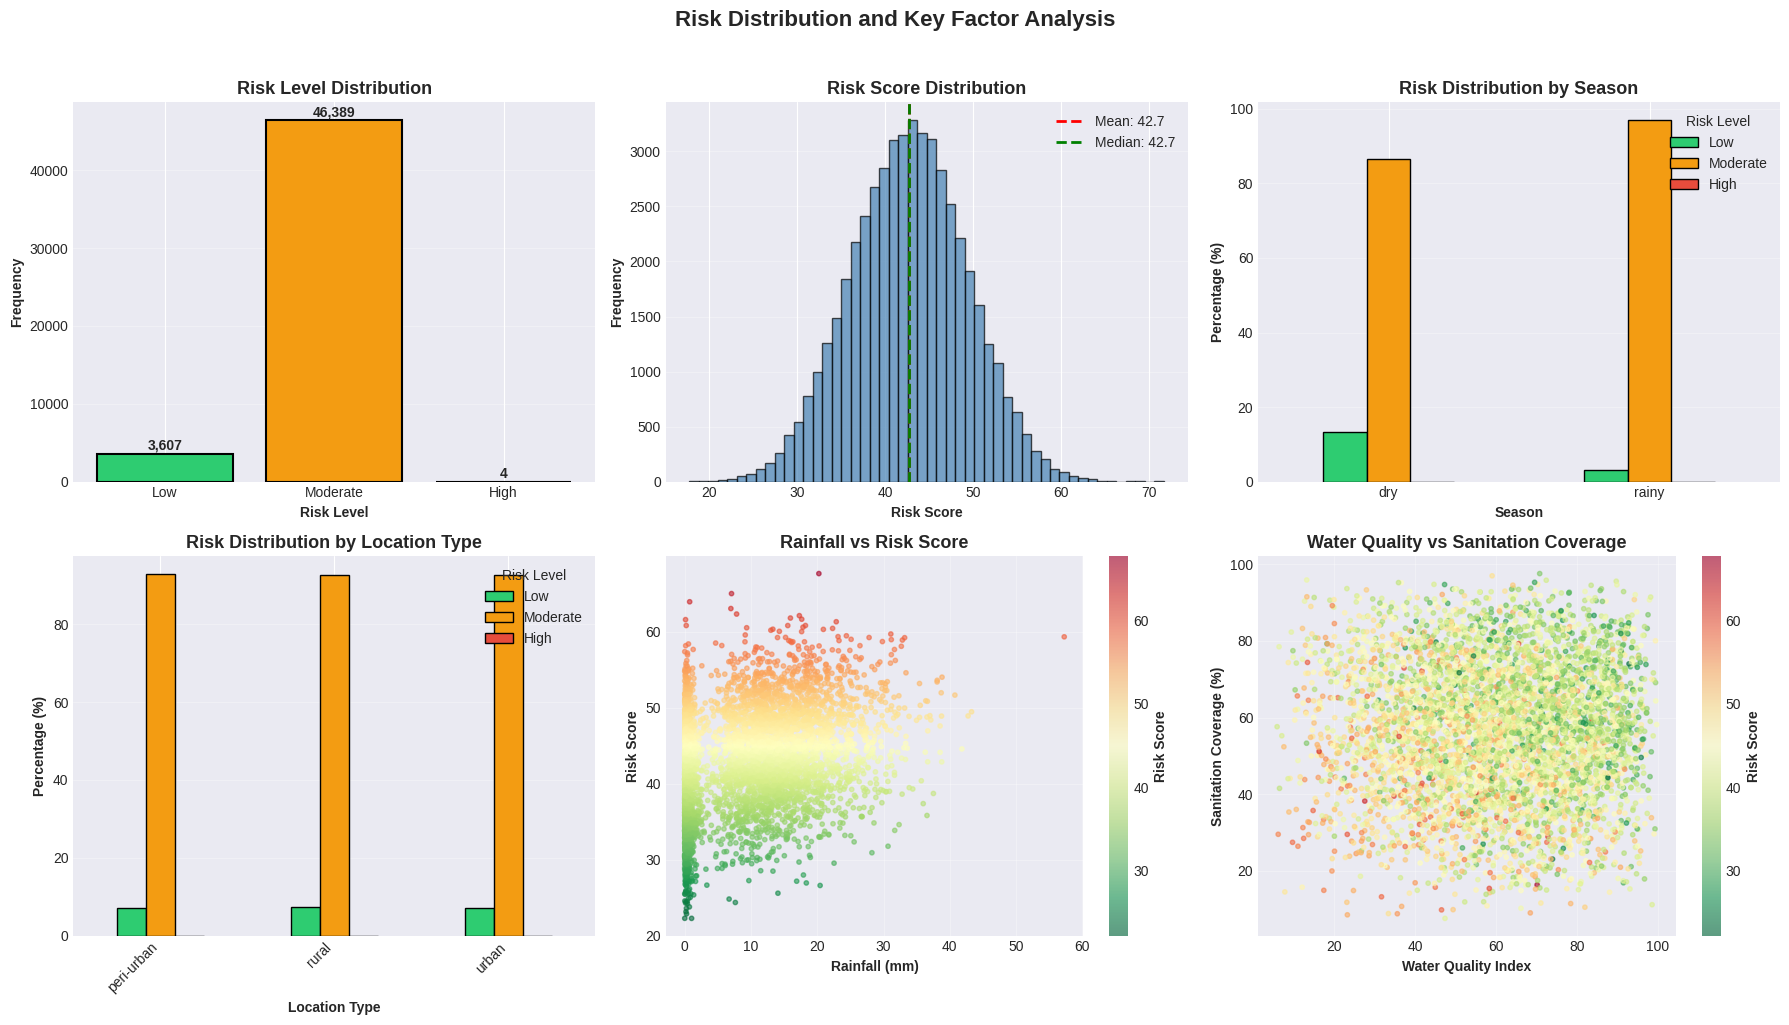

In [ ]:
"""
Cell 4: Exploratory Data Analysis - Visualize data distributions
"""

print("="*90)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*90)

print("\n📊 Generating distribution visualizations...")

# ============================================================================
# FIGURE 1: RISK DISTRIBUTION ANALYSIS
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Risk Distribution and Key Factor Analysis',
             fontsize=16, fontweight='bold', y=1.02)

# Plot 1: Risk Level Bar Chart
risk_counts = df['risk_level'].value_counts().sort_index()
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Green, Orange, Red
axes[0,0].bar(risk_counts.index, risk_counts.values, color=colors,
              edgecolor='black', linewidth=1.5)
axes[0,0].set_title('Risk Level Distribution', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel('Risk Level')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(axis='y', alpha=0.3)
for i, v in enumerate(risk_counts.values):
    axes[0,0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Plot 2: Risk Score Histogram
axes[0,1].hist(df['risk_score'], bins=50, color='steelblue',
               edgecolor='black', alpha=0.7)
axes[0,1].axvline(df['risk_score'].mean(), color='red',
                  linestyle='--', linewidth=2, label=f'Mean: {df["risk_score"].mean():.1f}')
axes[0,1].axvline(df['risk_score'].median(), color='green',
                  linestyle='--', linewidth=2, label=f'Median: {df["risk_score"].median():.1f}')
axes[0,1].set_title('Risk Score Distribution', fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('Risk Score')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(axis='y', alpha=0.3)

# Plot 3: Risk by Season
season_risk = pd.crosstab(df['season'], df['risk_level'], normalize='index') * 100
season_risk.plot(kind='bar', ax=axes[0,2], color=colors,
                 edgecolor='black', linewidth=1)
axes[0,2].set_title('Risk Distribution by Season', fontsize=13, fontweight='bold')
axes[0,2].set_xlabel('Season')
axes[0,2].set_ylabel('Percentage (%)')
axes[0,2].legend(title='Risk Level', loc='upper right')
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=0)
axes[0,2].grid(axis='y', alpha=0.3)

# Plot 4: Risk by Location Type
location_risk = pd.crosstab(df['location_type'], df['risk_level'], normalize='index') * 100
location_risk.plot(kind='bar', ax=axes[1,0], color=colors,
                   edgecolor='black', linewidth=1)
axes[1,0].set_title('Risk Distribution by Location Type', fontsize=13, fontweight='bold')
axes[1,0].set_xlabel('Location Type')
axes[1,0].set_ylabel('Percentage (%)')
axes[1,0].legend(title='Risk Level', loc='upper right')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].grid(axis='y', alpha=0.3)

# Plot 5: Rainfall vs Risk Score (Scatter)
scatter_sample = df.sample(n=min(5000, len(df)), random_state=42)
scatter = axes[1,1].scatter(scatter_sample['rainfall_mm'],
                           scatter_sample['risk_score'],
                           c=scatter_sample['risk_score'],
                           cmap='RdYlGn_r', alpha=0.6, s=10)
axes[1,1].set_title('Rainfall vs Risk Score', fontsize=13, fontweight='bold')
axes[1,1].set_xlabel('Rainfall (mm)')
axes[1,1].set_ylabel('Risk Score')
plt.colorbar(scatter, ax=axes[1,1], label='Risk Score')
axes[1,1].grid(alpha=0.3)

# Plot 6: Water Quality vs Sanitation Coverage (Risk-colored)
scatter2 = axes[1,2].scatter(scatter_sample['water_quality_index'],
                            scatter_sample['sanitation_coverage_pct'],
                            c=scatter_sample['risk_score'],
                            cmap='RdYlGn_r', alpha=0.6, s=10)
axes[1,2].set_title('Water Quality vs Sanitation Coverage', fontsize=13, fontweight='bold')
axes[1,2].set_xlabel('Water Quality Index')
axes[1,2].set_ylabel('Sanitation Coverage (%)')
plt.colorbar(scatter2, ax=axes[1,2], label='Risk Score')
axes[1,2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('01_risk_distribution_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 01_risk_distribution_analysis.png")
plt.show()

print(f"\n{'='*90}\n")

CORRELATION ANALYSIS

🔗 Computing feature correlations...
   Analyzing 26 numerical features...
✅ Saved: 02_correlation_matrix.png


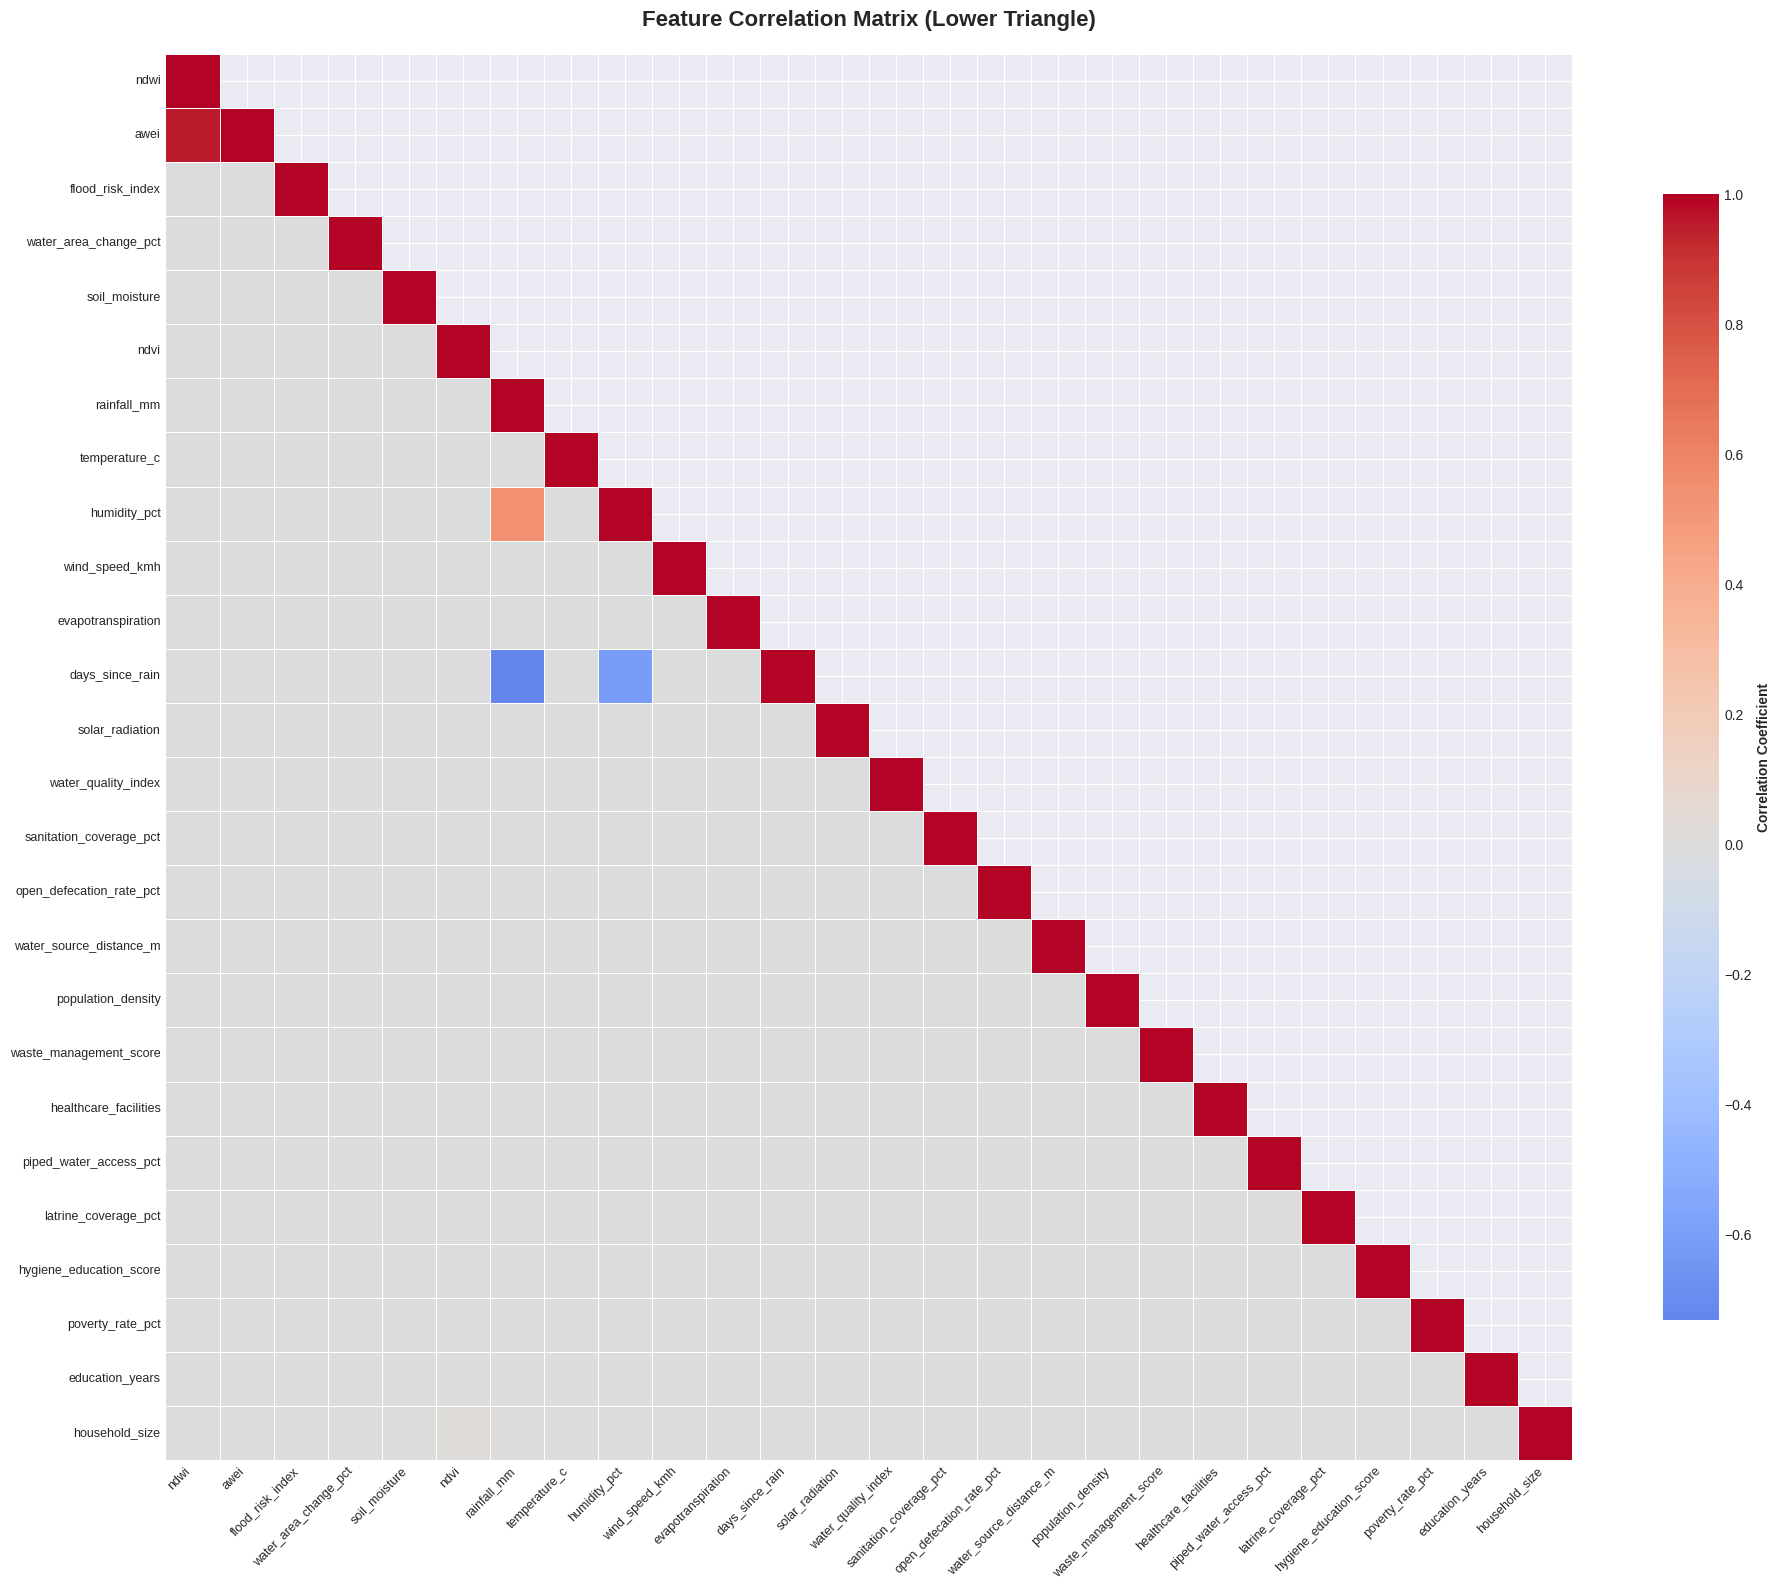


🔍 Identifying highly correlated feature pairs...

⚠️  Found 2 highly correlated pairs (|r| > 0.7):
  Feature 1       Feature 2  Correlation
       ndwi            awei       0.9544
rainfall_mm days_since_rain      -0.7300

💡 Consider feature selection to remove redundant features




In [ ]:
"""
Cell 5: Correlation analysis between features
"""

print("="*90)
print("CORRELATION ANALYSIS")
print("="*90)

print("\n🔗 Computing feature correlations...")

# Select numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove metadata columns
exclude_from_corr = ['latitude', 'longitude', 'risk_score', 'income_level']
numerical_cols = [col for col in numerical_cols if col not in exclude_from_corr]

print(f"   Analyzing {len(numerical_cols)} numerical features...")

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# ============================================================================
# VISUALIZATION: CORRELATION HEATMAP
# ============================================================================

plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=False,  # Too many features for annotations
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title('Feature Correlation Matrix (Lower Triangle)',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('02_correlation_matrix.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 02_correlation_matrix.png")
plt.show()

# ============================================================================
# IDENTIFY HIGHLY CORRELATED FEATURES
# ============================================================================

print("\n🔍 Identifying highly correlated feature pairs...")

# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find correlations > 0.7 or < -0.7
high_correlations = []
for column in upper_triangle.columns:
    for index in upper_triangle.index:
        corr_value = upper_triangle.loc[index, column]
        if pd.notna(corr_value) and abs(corr_value) > 0.7:
            high_correlations.append({
                'Feature 1': index,
                'Feature 2': column,
                'Correlation': corr_value
            })

if high_correlations:
    high_corr_df = pd.DataFrame(high_correlations).sort_values(
        'Correlation', ascending=False, key=abs
    )
    print(f"\n⚠️  Found {len(high_corr_df)} highly correlated pairs (|r| > 0.7):")
    print(high_corr_df.to_string(index=False))
    print("\n💡 Consider feature selection to remove redundant features")
else:
    print("\n✅ No highly correlated pairs found (|r| > 0.7)")

print(f"\n{'='*90}\n")

FEATURE ANALYSIS BY RISK LEVEL

📦 Creating box plots for key features...
✅ Saved: 03_features_by_risk_level.png


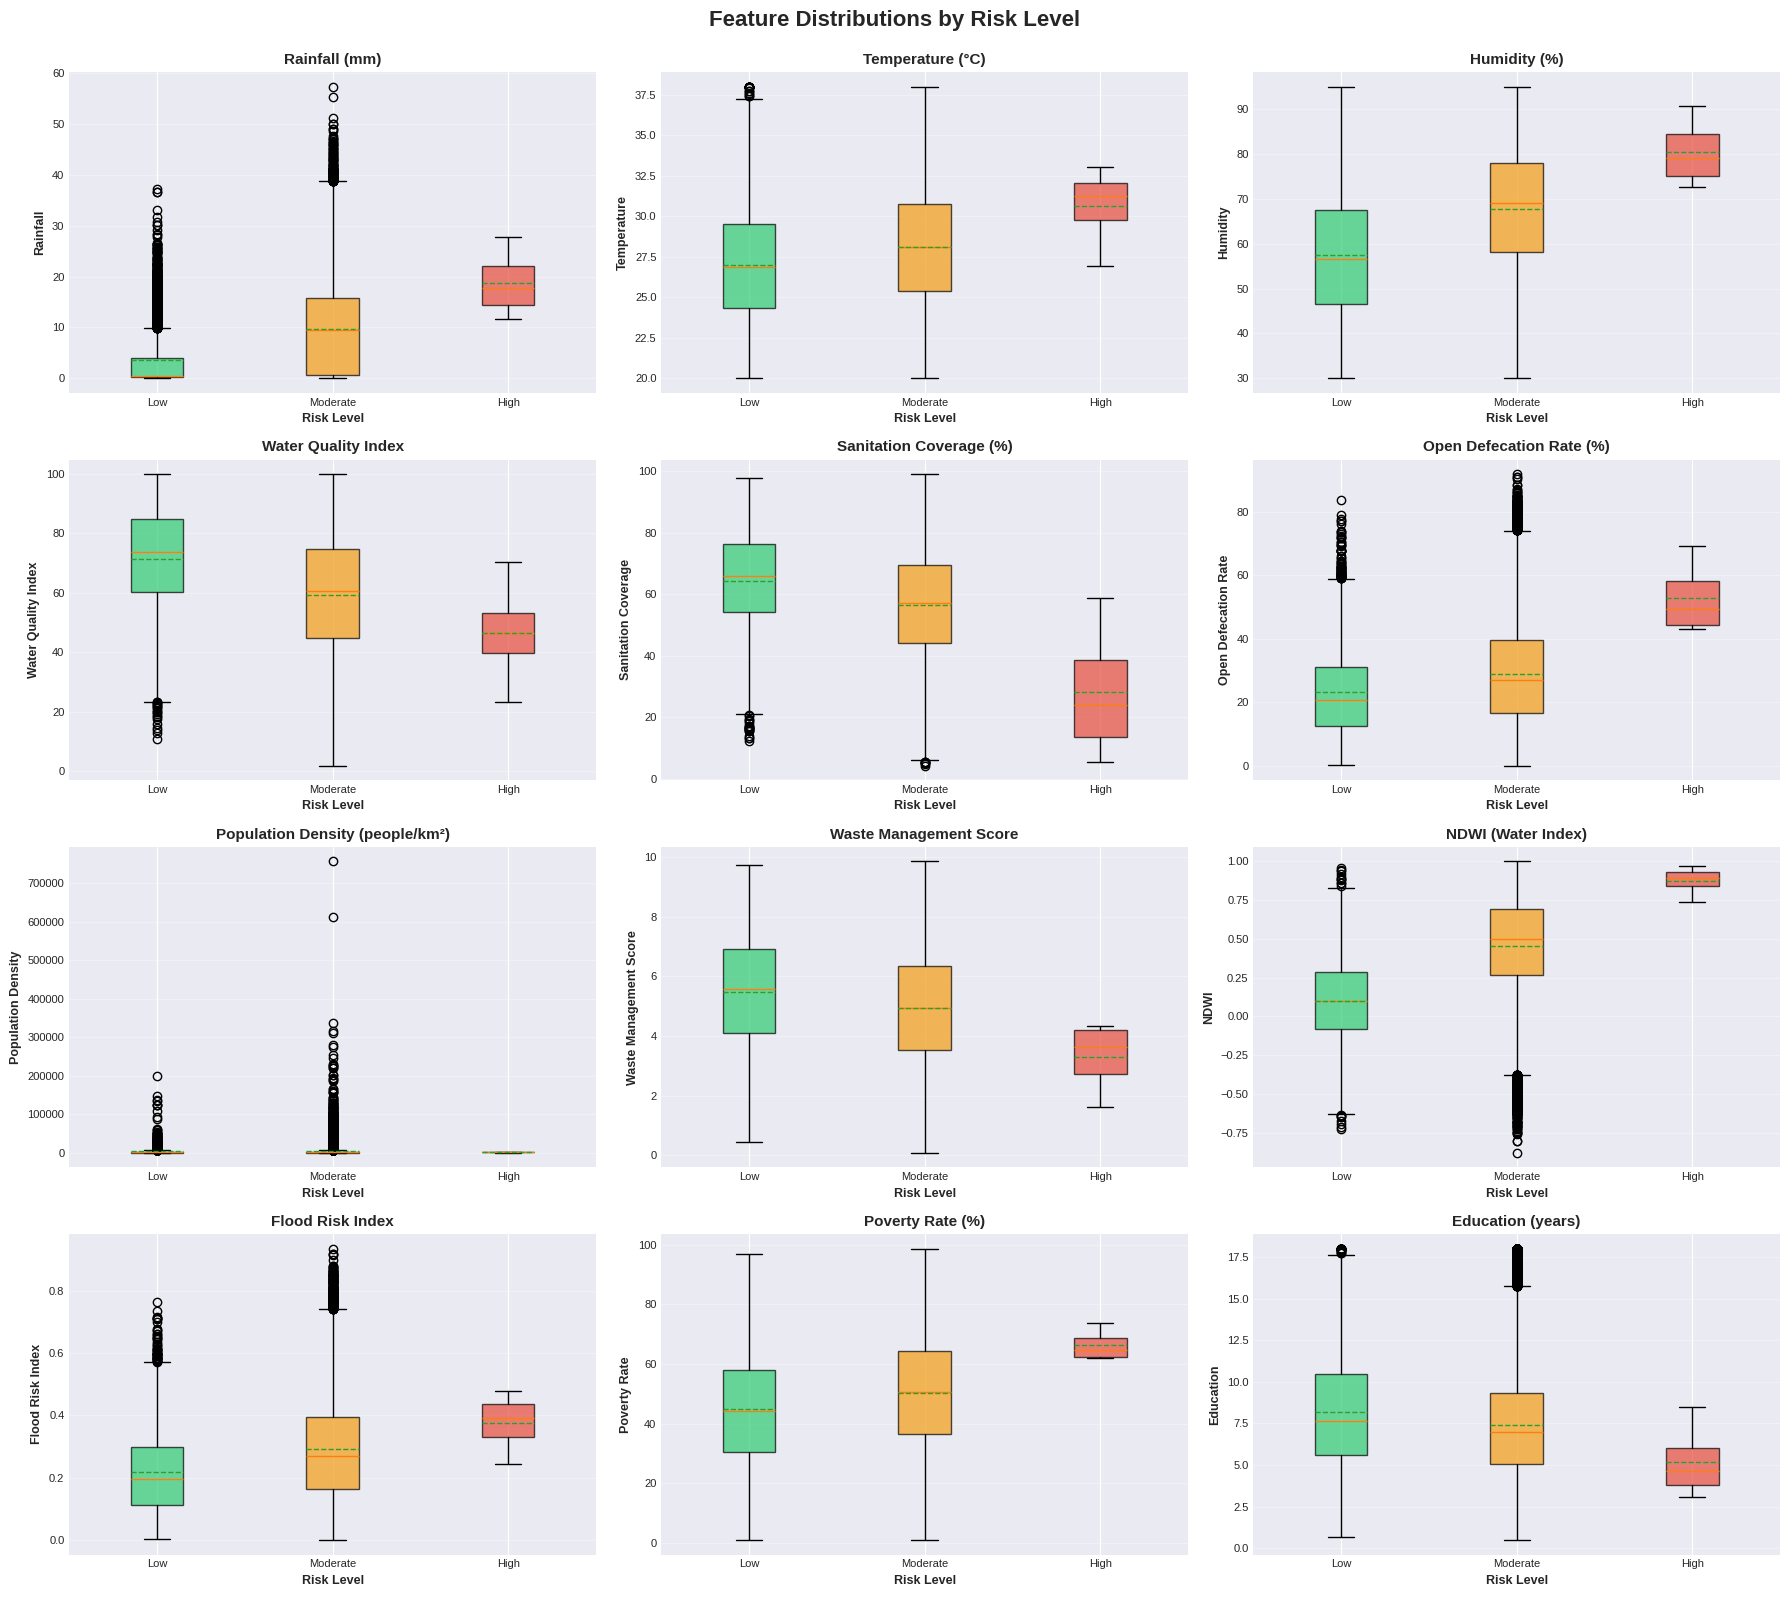


STATISTICAL SUMMARY BY RISK LEVEL

📊 LOW RISK (n=3,607)
------------------------------------------------------------------------------------------
   Rainfall            :     3.55 mm
   Temperature         :    26.97 °C
   Humidity            :    57.39 %
   Water Quality       :    71.39 /100
   Sanitation Coverage :    64.44 %
   Open Defecation     :    23.14 %
   Population Density  :  3357.90 people/km²
   NDWI                :     0.10 
   Flood Risk          :     0.22 

📊 MODERATE RISK (n=46,389)
------------------------------------------------------------------------------------------
   Rainfall            :     9.63 mm
   Temperature         :    28.11 °C
   Humidity            :    67.71 %
   Water Quality       :    59.19 /100
   Sanitation Coverage :    56.48 %
   Open Defecation     :    29.04 %
   Population Density  :  3409.07 people/km²
   NDWI                :     0.46 
   Flood Risk          :     0.29 

📊 HIGH RISK (n=4)
------------------------------------------

In [ ]:
"""
Cell 6: Box plots showing feature distributions across risk levels
"""

print("="*90)
print("FEATURE ANALYSIS BY RISK LEVEL")
print("="*90)

print("\n📦 Creating box plots for key features...")

# Select key features to visualize
key_features = [
    ('rainfall_mm', 'Rainfall (mm)'),
    ('temperature_c', 'Temperature (°C)'),
    ('humidity_pct', 'Humidity (%)'),
    ('water_quality_index', 'Water Quality Index'),
    ('sanitation_coverage_pct', 'Sanitation Coverage (%)'),
    ('open_defecation_rate_pct', 'Open Defecation Rate (%)'),
    ('population_density', 'Population Density (people/km²)'),
    ('waste_management_score', 'Waste Management Score'),
    ('ndwi', 'NDWI (Water Index)'),
    ('flood_risk_index', 'Flood Risk Index'),
    ('poverty_rate_pct', 'Poverty Rate (%)'),
    ('education_years', 'Education (years)')
]

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

fig.suptitle('Feature Distributions by Risk Level',
             fontsize=16, fontweight='bold', y=0.995)

# Color palette for risk levels
colors = {'Low': '#2ecc71', 'Moderate': '#f39c12', 'High': '#e74c3c'}

for idx, (feature, title) in enumerate(key_features):
    # Create box plot
    bp = axes[idx].boxplot(
        [df[df['risk_level'] == level][feature].dropna() for level in ['Low', 'Moderate', 'High']],
        labels=['Low', 'Moderate', 'High'],
        patch_artist=True,
        showmeans=True,
        meanline=True
    )

    # Color boxes
    for patch, level in zip(bp['boxes'], ['Low', 'Moderate', 'High']):
        patch.set_facecolor(colors[level])
        patch.set_alpha(0.7)

    axes[idx].set_title(title, fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Risk Level', fontsize=9)
    axes[idx].set_ylabel(title.split('(')[0].strip(), fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(labelsize=8)

plt.tight_layout()
plt.savefig('03_features_by_risk_level.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 03_features_by_risk_level.png")
plt.show()

# ============================================================================
# STATISTICAL SUMMARY BY RISK LEVEL
# ============================================================================

print("\n" + "="*90)
print("STATISTICAL SUMMARY BY RISK LEVEL")
print("="*90)

for level in ['Low', 'Moderate', 'High']:
    subset = df[df['risk_level'] == level]
    print(f"\n📊 {level.upper()} RISK (n={len(subset):,})")
    print("-" * 90)

    stats = [
        ('Rainfall', subset['rainfall_mm'].mean(), 'mm'),
        ('Temperature', subset['temperature_c'].mean(), '°C'),
        ('Humidity', subset['humidity_pct'].mean(), '%'),
        ('Water Quality', subset['water_quality_index'].mean(), '/100'),
        ('Sanitation Coverage', subset['sanitation_coverage_pct'].mean(), '%'),
        ('Open Defecation', subset['open_defecation_rate_pct'].mean(), '%'),
        ('Population Density', subset['population_density'].mean(), 'people/km²'),
        ('NDWI', subset['ndwi'].mean(), ''),
        ('Flood Risk', subset['flood_risk_index'].mean(), '')
    ]

    for stat_name, value, unit in stats:
        print(f"   {stat_name:20s}: {value:8.2f} {unit}")

print(f"\n{'='*90}\n")

In [ ]:
"""
Cell 7: Create domain-specific features based on epidemiological knowledge
"""

print("="*90)
print("STEP 4: ADVANCED FEATURE ENGINEERING")
print("="*90)
print("Part 1: Domain-Specific Indices")
print("-" * 90)

# Make a copy for feature engineering
df_engineered = df.copy()

print("\n🔬 Creating epidemiologically-informed composite indices...")

# ============================================================================
# DOMAIN-SPECIFIC INDEX 1: WASH (Water, Sanitation, Hygiene) Risk Index
# ============================================================================
print("\n[1/10] WASH Risk Index...")
print("   Combines: water quality, sanitation coverage, open defecation, hygiene education")

df_engineered['wash_risk_index'] = (
    (100 - df_engineered['water_quality_index']) * 0.35 +
    (100 - df_engineered['sanitation_coverage_pct']) * 0.25 +
    df_engineered['open_defecation_rate_pct'] * 0.25 +
    (10 - df_engineered['hygiene_education_score']) * 10 * 0.15
) / 100  # Normalize to 0-1

# ============================================================================
# DOMAIN-SPECIFIC INDEX 2: Environmental Exposure Index
# ============================================================================
print("[2/10] Environmental Exposure Index...")
print("   Combines: water indices (NDWI, AWEI), flood risk, soil moisture")

df_engineered['environmental_exposure'] = (
    df_engineered['ndwi'].clip(0, 1) * 0.35 +
    df_engineered['awei'].clip(0, 1) * 0.25 +
    df_engineered['flood_risk_index'] * 0.30 +
    df_engineered['soil_moisture'] * 0.10
)

# ============================================================================
# DOMAIN-SPECIFIC INDEX 3: Climate Risk Score
# ============================================================================
print("[3/10] Climate Risk Score...")
print("   Combines: rainfall, temperature, humidity, evapotranspiration")

# Normalize each component
rainfall_norm = df_engineered['rainfall_mm'] / df_engineered['rainfall_mm'].max()
temp_norm = (df_engineered['temperature_c'] - 20) / (38 - 20)
humidity_norm = df_engineered['humidity_pct'] / 100
evap_norm = df_engineered['evapotranspiration'] / df_engineered['evapotranspiration'].max()

df_engineered['climate_risk_score'] = (
    rainfall_norm * 0.40 +
    humidity_norm * 0.30 +
    temp_norm * 0.20 +
    (1 - evap_norm) * 0.10  # Low evapotranspiration increases risk
)

# ============================================================================
# DOMAIN-SPECIFIC INDEX 4: Population Vulnerability Index
# ============================================================================
print("[4/10] Population Vulnerability Index...")
print("   Combines: population density, poverty, education, healthcare access")

pop_density_norm = df_engineered['population_density'] / df_engineered['population_density'].max()
poverty_norm = df_engineered['poverty_rate_pct'] / 100
education_norm = 1 - (df_engineered['education_years'] / 18)  # Inverse: lower education = higher risk
healthcare_norm = 1 - (df_engineered['healthcare_facilities'] / df_engineered['healthcare_facilities'].max())

df_engineered['population_vulnerability'] = (
    pop_density_norm * 0.30 +
    poverty_norm * 0.30 +
    education_norm * 0.25 +
    healthcare_norm * 0.15
)

# ============================================================================
# DOMAIN-SPECIFIC INDEX 5: Water Access Stress Index
# ============================================================================
print("[5/10] Water Access Stress Index...")
print("   Combines: water source distance, piped water access, water area change")

distance_norm = df_engineered['water_source_distance_m'] / df_engineered['water_source_distance_m'].max()
piped_access_norm = 1 - (df_engineered['piped_water_access_pct'] / 100)
water_change_norm = df_engineered['water_area_change_pct'].clip(-100, 0).abs() / 100

df_engineered['water_stress_index'] = (
    distance_norm * 0.40 +
    piped_access_norm * 0.40 +
    water_change_norm * 0.20
)

# ============================================================================
# DOMAIN-SPECIFIC INDEX 6: Infrastructure Quality Index
# ============================================================================
print("[6/10] Infrastructure Quality Index...")
print("   Combines: sanitation, waste management, latrine coverage")

df_engineered['infrastructure_quality'] = (
    df_engineered['sanitation_coverage_pct'] * 0.40 +
    df_engineered['waste_management_score'] * 10 * 0.35 +
    df_engineered['latrine_coverage_pct'] * 0.25
) / 100  # Normalize to 0-1

# ============================================================================
# DOMAIN-SPECIFIC INDEX 7: Seasonal Amplification Factor
# ============================================================================
print("[7/10] Seasonal Amplification Factor...")
print("   Binary multiplier: rainy season = 1.5x, dry season = 0.7x")

df_engineered['seasonal_amplification'] = np.where(
    df_engineered['season'] == 'rainy',
    1.5,  # 50% amplification in rainy season
    0.7   # 30% reduction in dry season
)

# ============================================================================
# DOMAIN-SPECIFIC INDEX 8: Crowding Index
# ============================================================================
print("[8/10] Crowding Index...")
print("   Combines: population density, household size")

household_norm = (df_engineered['household_size'] - 1) / 14  # Normalize 1-15 to 0-1

df_engineered['crowding_index'] = (
    pop_density_norm * 0.60 +
    household_norm * 0.40
)

# ============================================================================
# DOMAIN-SPECIFIC INDEX 9: Fecal Contamination Risk
# ============================================================================
print("[9/10] Fecal Contamination Risk...")
print("   Combines: open defecation, water quality, latrine coverage")

latrine_norm = 1 - (df_engineered['latrine_coverage_pct'] / 100)
water_qual_norm = 1 - (df_engineered['water_quality_index'] / 100)
open_defec_norm = df_engineered['open_defecation_rate_pct'] / 100

df_engineered['fecal_contamination_risk'] = (
    open_defec_norm * 0.45 +
    water_qual_norm * 0.35 +
    latrine_norm * 0.20
)

# ============================================================================
# DOMAIN-SPECIFIC INDEX 10: Pathogen Survival Probability
# ============================================================================
print("[10/10] Pathogen Survival Probability...")
print("   Combines: temperature, humidity, solar radiation (biological factors)")

# Optimal pathogen survival: moderate temp (25-30°C), high humidity, low solar radiation
temp_optimal = 1 - np.abs(df_engineered['temperature_c'] - 27.5) / 10  # Peak at 27.5°C
temp_optimal = temp_optimal.clip(0, 1)

solar_norm = 1 - (df_engineered['solar_radiation'] / df_engineered['solar_radiation'].max())

df_engineered['pathogen_survival_prob'] = (
    temp_optimal * 0.35 +
    humidity_norm * 0.40 +
    solar_norm * 0.25
)

print(f"\n✅ Created 10 domain-specific indices")

# ============================================================================
# SUMMARY
# ============================================================================

domain_features = [
    'wash_risk_index', 'environmental_exposure', 'climate_risk_score',
    'population_vulnerability', 'water_stress_index', 'infrastructure_quality',
    'seasonal_amplification', 'crowding_index', 'fecal_contamination_risk',
    'pathogen_survival_prob'
]

print(f"\n📊 Domain-Specific Features Summary:")
for feature in domain_features:
    mean_val = df_engineered[feature].mean()
    std_val = df_engineered[feature].std()
    print(f"   {feature:30s}: μ={mean_val:.3f}, σ={std_val:.3f}")

print(f"\n{'='*90}\n")

STEP 4: ADVANCED FEATURE ENGINEERING
Part 1: Domain-Specific Indices
------------------------------------------------------------------------------------------

🔬 Creating epidemiologically-informed composite indices...

[1/10] WASH Risk Index...
   Combines: water quality, sanitation coverage, open defecation, hygiene education
[2/10] Environmental Exposure Index...
   Combines: water indices (NDWI, AWEI), flood risk, soil moisture
[3/10] Climate Risk Score...
   Combines: rainfall, temperature, humidity, evapotranspiration
[4/10] Population Vulnerability Index...
   Combines: population density, poverty, education, healthcare access
[5/10] Water Access Stress Index...
   Combines: water source distance, piped water access, water area change
[6/10] Infrastructure Quality Index...
   Combines: sanitation, waste management, latrine coverage
[7/10] Seasonal Amplification Factor...
   Binary multiplier: rainy season = 1.5x, dry season = 0.7x
[8/10] Crowding Index...
   Combines: populatio

In [ ]:
"""
Cell 8: Create interaction features capturing synergistic effects
"""

print("="*90)
print("Part 2: Interaction Features")
print("-" * 90)

print("\n🔗 Creating interaction terms for synergistic effects...")
print("   Rationale: Combined factors often have multiplicative, not additive, effects\n")

interaction_count = 0

# ============================================================================
# CRITICAL INTERACTIONS (Based on Disease Transmission Pathways)
# ============================================================================

print("[Critical Interactions - Disease Transmission]")

# 1. Rainfall × Open Defecation (fecal-oral contamination)
print("   [1] Rainfall × Open Defecation: Fecal matter washed into water sources")
df_engineered['rainfall_x_open_defecation'] = (
    df_engineered['rainfall_mm'] * df_engineered['open_defecation_rate_pct']
)
interaction_count += 1

# 2. Flood Risk × Population Density (mass exposure events)
print("   [2] Flood Risk × Population Density: Many people exposed during floods")
df_engineered['flood_x_population'] = (
    df_engineered['flood_risk_index'] * df_engineered['population_density']
)
interaction_count += 1

# 3. NDWI × Poor Water Quality (contaminated water bodies)
print("   [3] NDWI × Poor Water Quality: Large contaminated water bodies")
df_engineered['ndwi_x_poor_water_quality'] = (
    df_engineered['ndwi'].clip(0, 1) * (100 - df_engineered['water_quality_index'])
)
interaction_count += 1

# 4. Temperature × Humidity (pathogen survival)
print("   [4] Temperature × Humidity: Optimal pathogen survival conditions")
df_engineered['temp_x_humidity'] = (
    df_engineered['temperature_c'] * df_engineered['humidity_pct']
)
interaction_count += 1

# 5. Rainfall × Flood Risk (acute flooding events)
print("   [5] Rainfall × Flood Risk: Heavy rain in flood-prone areas")
df_engineered['rainfall_x_flood_risk'] = (
    df_engineered['rainfall_mm'] * df_engineered['flood_risk_index']
)
interaction_count += 1

# 6. Water Distance × Population Density (water access crisis)
print("   [6] Water Distance × Population: Many people traveling far for water")
df_engineered['water_distance_x_population'] = (
    df_engineered['water_source_distance_m'] * df_engineered['population_density']
)
interaction_count += 1

# 7. Poor Sanitation × Crowding (transmission amplification)
print("   [7] Poor Sanitation × Household Size: Disease spreads in crowded unsanitary homes")
df_engineered['poor_sanitation_x_crowding'] = (
    (100 - df_engineered['sanitation_coverage_pct']) * df_engineered['household_size']
)
interaction_count += 1

# 8. Poverty × Poor Water Quality (vulnerable populations)
print("   [8] Poverty × Poor Water Quality: Poor can't afford alternatives")
df_engineered['poverty_x_poor_water'] = (
    df_engineered['poverty_rate_pct'] * (100 - df_engineered['water_quality_index'])
)
interaction_count += 1

# ============================================================================
# ENVIRONMENTAL INTERACTIONS
# ============================================================================

print("\n[Environmental Interactions]")

# 9. Environmental Exposure × Climate Risk (compound environmental stress)
print("   [9] Environmental Exposure × Climate Risk: Multiple environmental stressors")
df_engineered['env_exposure_x_climate'] = (
    df_engineered['environmental_exposure'] * df_engineered['climate_risk_score']
)
interaction_count += 1

# 10. Soil Moisture × Rainfall (surface water accumulation)
print("   [10] Soil Moisture × Rainfall: Saturated soil + rain = standing water")
df_engineered['soil_moisture_x_rainfall'] = (
    df_engineered['soil_moisture'] * df_engineered['rainfall_mm']
)
interaction_count += 1

# 11. NDWI × AWEI (comprehensive water presence)
print("   [11] NDWI × AWEI: Strong water presence signal")
df_engineered['ndwi_x_awei'] = (
    df_engineered['ndwi'].clip(0, 1) * df_engineered['awei'].clip(0, 1)
)
interaction_count += 1

# 12. Wind Speed × Evapotranspiration (drying effect)
print("   [12] Wind Speed × Evapotranspiration: Rapid water loss (protective)")
df_engineered['wind_x_evap'] = (
    df_engineered['wind_speed_kmh'] * df_engineered['evapotranspiration']
)
interaction_count += 1

# ============================================================================
# INFRASTRUCTURE INTERACTIONS
# ============================================================================

print("\n[Infrastructure Interactions]")

# 13. Sanitation Coverage × Waste Management (infrastructure synergy)
print("   [13] Sanitation × Waste Management: Good systems work together")
df_engineered['sanitation_x_waste_mgmt'] = (
    df_engineered['sanitation_coverage_pct'] * df_engineered['waste_management_score']
)
interaction_count += 1

# 14. Piped Water × Water Quality (safe water access)
print("   [14] Piped Water × Water Quality: Safe water delivered to homes")
df_engineered['piped_water_x_quality'] = (
    df_engineered['piped_water_access_pct'] * df_engineered['water_quality_index']
)
interaction_count += 1

# 15. Latrine Coverage × Hygiene Education (behavior + infrastructure)
print("   [15] Latrines × Hygiene Education: Infrastructure + knowledge")
df_engineered['latrine_x_hygiene_ed'] = (
    df_engineered['latrine_coverage_pct'] * df_engineered['hygiene_education_score']
)
interaction_count += 1

# ============================================================================
# SOCIOECONOMIC INTERACTIONS
# ============================================================================

print("\n[Socioeconomic Interactions]")

# 16. Education × Hygiene Education (knowledge compound effect)
print("   [16] Education × Hygiene Education: General + specific knowledge")
df_engineered['education_x_hygiene'] = (
    df_engineered['education_years'] * df_engineered['hygiene_education_score']
)
interaction_count += 1

# 17. Poverty × Healthcare Facilities (access barriers)
print("   [17] Poverty × Low Healthcare: Poor can't access scarce facilities")
df_engineered['poverty_x_low_healthcare'] = (
    df_engineered['poverty_rate_pct'] *
    (1 / (df_engineered['healthcare_facilities'] + 0.1))  # Inverse relationship
)
interaction_count += 1

# 18. Income × Sanitation Coverage (economic capacity)
print("   [18] Income × Sanitation: Wealth enables better infrastructure")
df_engineered['income_x_sanitation'] = (
    df_engineered['income_level'] * df_engineered['sanitation_coverage_pct']
)
interaction_count += 1

# ============================================================================
# COMPLEX TRIPLE INTERACTIONS (High-order)
# ============================================================================

print("\n[Complex Triple Interactions]")

# 19. Rainfall × Open Defecation × Population Density (perfect storm)
print("   [19] Rainfall × Open Defecation × Population: Mass contamination event")
df_engineered['rain_x_opendefec_x_pop'] = (
    df_engineered['rainfall_mm'] *
    df_engineered['open_defecation_rate_pct'] *
    np.log1p(df_engineered['population_density'])  # Log to prevent extreme values
)
interaction_count += 1

# 20. Temperature × Humidity × Poor Water Quality (pathogen paradise)
print("   [20] Temp × Humidity × Poor Water: Optimal conditions for pathogens")
df_engineered['temp_x_humid_x_poorwater'] = (
    df_engineered['temperature_c'] *
    df_engineered['humidity_pct'] *
    (100 - df_engineered['water_quality_index'])
) / 1000  # Scale down
interaction_count += 1

# ============================================================================
# COMPOSITE INDEX INTERACTIONS
# ============================================================================

print("\n[Composite Index Interactions]")

# 21. WASH Risk × Climate Risk (multi-domain risk)
print("   [21] WASH Risk × Climate Risk: Infrastructure + weather stress")
df_engineered['wash_x_climate'] = (
    df_engineered['wash_risk_index'] * df_engineered['climate_risk_score']
)
interaction_count += 1

# 22. Population Vulnerability × Environmental Exposure (exposure + susceptibility)
print("   [22] Pop Vulnerability × Env Exposure: Vulnerable populations in risky areas")
df_engineered['popvuln_x_envexp'] = (
    df_engineered['population_vulnerability'] * df_engineered['environmental_exposure']
)
interaction_count += 1

# 23. Water Stress × Infrastructure Quality (infrastructure under pressure)
print("   [23] Water Stress × Infrastructure Quality: System capacity test")
df_engineered['waterstress_x_infrastructure'] = (
    df_engineered['water_stress_index'] *
    (1 - df_engineered['infrastructure_quality'])  # Poor infrastructure
)
interaction_count += 1

# 24. Fecal Contamination × Crowding (transmission probability)
print("   [24] Fecal Contamination × Crowding: High transmission likelihood")
df_engineered['fecal_x_crowding'] = (
    df_engineered['fecal_contamination_risk'] * df_engineered['crowding_index']
)
interaction_count += 1

# 25. Pathogen Survival × WASH Risk (viability + exposure pathway)
print("   [25] Pathogen Survival × WASH Risk: Viable pathogens + exposure routes")
df_engineered['pathogen_x_wash'] = (
    df_engineered['pathogen_survival_prob'] * df_engineered['wash_risk_index']
)
interaction_count += 1

print(f"\n✅ Created {interaction_count} interaction features")

print(f"\n{'='*90}\n")

Part 2: Interaction Features
------------------------------------------------------------------------------------------

🔗 Creating interaction terms for synergistic effects...
   Rationale: Combined factors often have multiplicative, not additive, effects

[Critical Interactions - Disease Transmission]
   [1] Rainfall × Open Defecation: Fecal matter washed into water sources
   [2] Flood Risk × Population Density: Many people exposed during floods
   [3] NDWI × Poor Water Quality: Large contaminated water bodies
   [4] Temperature × Humidity: Optimal pathogen survival conditions
   [5] Rainfall × Flood Risk: Heavy rain in flood-prone areas
   [6] Water Distance × Population: Many people traveling far for water
   [7] Poor Sanitation × Household Size: Disease spreads in crowded unsanitary homes
   [8] Poverty × Poor Water Quality: Poor can't afford alternatives

[Environmental Interactions]
   [9] Environmental Exposure × Climate Risk: Multiple environmental stressors
   [10] Soil Mois

In [ ]:
"""
Cell 9: Create polynomial and transformed features for non-linear relationships
"""

print("="*90)
print("Part 3: Polynomial and Transformed Features")
print("-" * 90)

print("\n📐 Creating polynomial and mathematical transformations...")
print("   Purpose: Capture non-linear relationships and threshold effects\n")

poly_count = 0

# ============================================================================
# SQUARED TERMS (Quadratic relationships)
# ============================================================================

print("[Squared Terms - Quadratic Effects]")

# Features where relationship might be U-shaped or accelerating
squared_features = [
    ('rainfall_mm', 'Rainfall: Exponential flood risk at high values'),
    ('temperature_c', 'Temperature: Optimal range with extremes harmful'),
    ('population_density', 'Population: Network effects accelerate transmission'),
    ('humidity_pct', 'Humidity: Non-linear pathogen survival'),
    ('open_defecation_rate_pct', 'Open Defecation: Accelerating contamination'),
    ('household_size', 'Household Size: Crowding effects multiply')
]

for feature, description in squared_features:
    new_feature = f'{feature}_squared'
    df_engineered[new_feature] = df_engineered[feature] ** 2
    print(f"   [{poly_count + 1}] {new_feature}: {description}")
    poly_count += 1

# ============================================================================
# CUBIC TERMS (Strong non-linearity)
# ============================================================================

print("\n[Cubic Terms - Strong Non-linear Effects]")

# Features with extreme threshold effects
cubic_features = [
    ('rainfall_mm', 'Rainfall: Catastrophic flooding at extreme values'),
    ('population_density', 'Population: Epidemic threshold dynamics')
]

for feature, description in cubic_features:
    new_feature = f'{feature}_cubed'
    df_engineered[new_feature] = df_engineered[feature] ** 3
    print(f"   [{poly_count + 1}] {new_feature}: {description}")
    poly_count += 1

# ============================================================================
# SQUARE ROOT TERMS (Diminishing returns)
# ============================================================================

print("\n[Square Root Terms - Diminishing Returns]")

# Features where effect diminishes at high values
sqrt_features = [
    ('rainfall_mm', 'Rainfall: Diminishing marginal risk increase'),
    ('water_source_distance_m', 'Water Distance: Linear burden up to a point'),
    ('population_density', 'Population: Initial impact strongest'),
    ('healthcare_facilities', 'Healthcare: First facility most important')
]

for feature, description in sqrt_features:
    new_feature = f'sqrt_{feature}'
    df_engineered[new_feature] = np.sqrt(df_engineered[feature])
    print(f"   [{poly_count + 1}] {new_feature}: {description}")
    poly_count += 1

# ============================================================================
# LOGARITHMIC TRANSFORMATIONS (Skewed distributions)
# ============================================================================

print("\n[Logarithmic Transformations - Skewed Distributions]")

# Features with heavy right skew
log_features = [
    ('population_density', 'Population: Log-normal urban distribution'),
    ('water_source_distance_m', 'Water Distance: Few very far sources'),
    ('poverty_rate_pct', 'Poverty: Exponential inequality'),
]

for feature, description in log_features:
    new_feature = f'log_{feature}'
    df_engineered[new_feature] = np.log1p(df_engineered[feature])  # log(1+x) to handle zeros
    print(f"   [{poly_count + 1}] {new_feature}: {description}")
    poly_count += 1

# ============================================================================
# EXPONENTIAL TRANSFORMATIONS (Threshold effects)
# ============================================================================

print("\n[Exponential Transformations - Threshold Effects]")

# Normalize first, then apply exponential
print(f"   [{poly_count + 1}] exp_wash_risk: Exponential risk above threshold")
wash_norm = df_engineered['wash_risk_index']
df_engineered['exp_wash_risk'] = np.exp(wash_norm) - 1  # Subtract 1 to start from 0
poly_count += 1

print(f"   [{poly_count + 1}] exp_fecal_contamination: Exponential pathogen load")
fecal_norm = df_engineered['fecal_contamination_risk']
df_engineered['exp_fecal_contamination'] = np.exp(fecal_norm) - 1
poly_count += 1

# ============================================================================
# RECIPROCAL TRANSFORMATIONS (Inverse relationships)
# ============================================================================

print("\n[Reciprocal Transformations - Inverse Relationships]")

# Features where low values have disproportionate impact
reciprocal_features = [
    ('water_quality_index', 'Water Quality: Low quality = high risk (inverse)'),
    ('sanitation_coverage_pct', 'Sanitation: Lack of coverage critical'),
    ('waste_management_score', 'Waste Management: Poor systems catastrophic')
]

for feature, description in reciprocal_features:
    new_feature = f'reciprocal_{feature}'
    # Add small constant to avoid division by zero
    df_engineered[new_feature] = 1 / (df_engineered[feature] + 1)
    print(f"   [{poly_count + 1}] {new_feature}: {description}")
    poly_count += 1

# ============================================================================
# POWER TRANSFORMATIONS (Flexible non-linearity)
# ============================================================================

print("\n[Power Transformations - Custom Exponents]")

# Specific power transformations for theoretical reasons
print(f"   [{poly_count + 1}] humidity_1.5: Sub-quadratic moisture effect")
df_engineered['humidity_1.5'] = df_engineered['humidity_pct'] ** 1.5
poly_count += 1

print(f"   [{poly_count + 1}] temperature_0.5: Mild temperature non-linearity")
df_engineered['temperature_0.5'] = df_engineered['temperature_c'] ** 0.5
poly_count += 1

# ============================================================================
# RATIO FEATURES (Relative metrics)
# ============================================================================

print("\n[Ratio Features - Relative Measures]")

print(f"   [{poly_count + 1}] sanitation_to_opendefec_ratio: Infrastructure effectiveness")
df_engineered['sanitation_to_opendefec_ratio'] = (
    df_engineered['sanitation_coverage_pct'] /
    (df_engineered['open_defecation_rate_pct'] + 1)  # Avoid division by zero
)
poly_count += 1

print(f"   [{poly_count + 1}] education_to_poverty_ratio: Socioeconomic resilience")
df_engineered['education_to_poverty_ratio'] = (
    df_engineered['education_years'] /
    (df_engineered['poverty_rate_pct'] + 1)
)
poly_count += 1

print(f"   [{poly_count + 1}] infrastructure_per_capita: Per-person infrastructure quality")
df_engineered['infrastructure_per_capita'] = (
    df_engineered['infrastructure_quality'] /
    (np.log1p(df_engineered['population_density']))
)
poly_count += 1

print(f"   [{poly_count + 1}] rainfall_to_evap_ratio: Net water balance")
df_engineered['rainfall_to_evap_ratio'] = (
    df_engineered['rainfall_mm'] /
    (df_engineered['evapotranspiration'] + 0.1)
)
poly_count += 1

# ============================================================================
# BINNED THRESHOLD INDICATORS (Step functions)
# ============================================================================

print("\n[Threshold Indicators - Binary/Step Functions]")

print(f"   [{poly_count + 1}] high_rainfall_indicator: Rainfall > 20mm threshold")
df_engineered['high_rainfall_indicator'] = (df_engineered['rainfall_mm'] > 20).astype(int)
poly_count += 1

print(f"   [{poly_count + 1}] poor_water_quality_indicator: Water quality < 50 threshold")
df_engineered['poor_water_quality_indicator'] = (df_engineered['water_quality_index'] < 50).astype(int)
poly_count += 1

print(f"   [{poly_count + 1}] high_population_indicator: High density > median")
median_pop = df_engineered['population_density'].median()
df_engineered['high_population_indicator'] = (df_engineered['population_density'] > median_pop).astype(int)
poly_count += 1

print(f"   [{poly_count + 1}] critical_sanitation_indicator: Sanitation < 30% threshold")
df_engineered['critical_sanitation_indicator'] = (df_engineered['sanitation_coverage_pct'] < 30).astype(int)
poly_count += 1

print(f"\n✅ Created {poly_count} polynomial and transformed features")

print(f"\n{'='*90}\n")

Part 3: Polynomial and Transformed Features
------------------------------------------------------------------------------------------

📐 Creating polynomial and mathematical transformations...
   Purpose: Capture non-linear relationships and threshold effects

[Squared Terms - Quadratic Effects]
   [1] rainfall_mm_squared: Rainfall: Exponential flood risk at high values
   [2] temperature_c_squared: Temperature: Optimal range with extremes harmful
   [3] population_density_squared: Population: Network effects accelerate transmission
   [4] humidity_pct_squared: Humidity: Non-linear pathogen survival
   [5] open_defecation_rate_pct_squared: Open Defecation: Accelerating contamination
   [6] household_size_squared: Household Size: Crowding effects multiply

[Cubic Terms - Strong Non-linear Effects]
   [7] rainfall_mm_cubed: Rainfall: Catastrophic flooding at extreme values
   [8] population_density_cubed: Population: Epidemic threshold dynamics

[Square Root Terms - Diminishing Returns]

In [ ]:
"""
Cell 10: Create statistical aggregation and percentile features
"""

print("="*90)
print("Part 4: Statistical Aggregation Features")
print("-" * 90)

print("\n📊 Creating statistical and percentile-based features...")
print("   Purpose: Capture relative position in distribution and statistical properties\n")

stat_count = 0

# ============================================================================
# PERCENTILE RANK FEATURES (Relative position)
# ============================================================================

print("[Percentile Rank Features - Relative Position in Distribution]")

# Features where relative position matters more than absolute value
percentile_features = [
    ('rainfall_mm', 'Rainfall: Relative wetness in sample'),
    ('temperature_c', 'Temperature: Relative heat'),
    ('water_quality_index', 'Water Quality: Relative quality ranking'),
    ('sanitation_coverage_pct', 'Sanitation: Relative infrastructure level'),
    ('population_density', 'Population: Relative crowding'),
    ('open_defecation_rate_pct', 'Open Defecation: Relative contamination level'),
    ('poverty_rate_pct', 'Poverty: Relative economic hardship'),
    ('education_years', 'Education: Relative knowledge level')
]

for feature, description in percentile_features:
    new_feature = f'{feature}_percentile'
    df_engineered[new_feature] = df_engineered[feature].rank(pct=True)
    print(f"   [{stat_count + 1}] {new_feature}: {description}")
    stat_count += 1

# ============================================================================
# Z-SCORE FEATURES (Standardized anomalies)
# ============================================================================

print("\n[Z-Score Features - Standardized Anomalies]")

# Features where deviations from mean matter
zscore_features = [
    ('rainfall_mm', 'Rainfall: How unusual is this rainfall?'),
    ('temperature_c', 'Temperature: Temperature anomaly'),
    ('humidity_pct', 'Humidity: Humidity deviation'),
    ('water_quality_index', 'Water Quality: Quality anomaly'),
    ('population_density', 'Population: Density anomaly')
]

for feature, description in zscore_features:
    new_feature = f'{feature}_zscore'
    mean_val = df_engineered[feature].mean()
    std_val = df_engineered[feature].std()
    df_engineered[new_feature] = (df_engineered[feature] - mean_val) / std_val
    print(f"   [{stat_count + 1}] {new_feature}: {description}")
    stat_count += 1

# ============================================================================
# QUANTILE-BASED BINNING (Categorical from continuous)
# ============================================================================

print("\n[Quantile-Based Binning - Categorical Encoding]")

# Bin into quartiles
print(f"   [{stat_count + 1}] rainfall_quartile: Rainfall divided into 4 groups")
df_engineered['rainfall_quartile'] = pd.qcut(
    df_engineered['rainfall_mm'],
    q=4,
    labels=[0, 1, 2, 3],
    duplicates='drop'
).astype(int)
stat_count += 1

print(f"   [{stat_count + 1}] water_quality_quartile: Water quality in 4 tiers")
df_engineered['water_quality_quartile'] = pd.qcut(
    df_engineered['water_quality_index'],
    q=4,
    labels=[0, 1, 2, 3],
    duplicates='drop'
).astype(int)
stat_count += 1

print(f"   [{stat_count + 1}] population_quartile: Population density tiers")
df_engineered['population_quartile'] = pd.qcut(
    df_engineered['population_density'],
    q=4,
    labels=[0, 1, 2, 3],
    duplicates='drop'
).astype(int)
stat_count += 1

# ============================================================================
# RANGE/SPREAD FEATURES (Variability indicators)
# ============================================================================

print("\n[Composite Variability Features]")

# Calculate local variability (distance from median)
print(f"   [{stat_count + 1}] rainfall_deviation_from_median: Rainfall relative to median")
df_engineered['rainfall_deviation_from_median'] = (
    df_engineered['rainfall_mm'] - df_engineered['rainfall_mm'].median()
)
stat_count += 1

print(f"   [{stat_count + 1}] temp_deviation_from_median: Temperature relative to median")
df_engineered['temp_deviation_from_median'] = (
    df_engineered['temperature_c'] - df_engineered['temperature_c'].median()
)
stat_count += 1

# ============================================================================
# EXTREME VALUE INDICATORS (Outlier detection)
# ============================================================================

print("\n[Extreme Value Indicators - Outlier Flags]")

# Flag extreme values (beyond 2 standard deviations)
print(f"   [{stat_count + 1}] extreme_rainfall_flag: Rainfall > 2 std dev")
rainfall_mean = df_engineered['rainfall_mm'].mean()
rainfall_std = df_engineered['rainfall_mm'].std()
df_engineered['extreme_rainfall_flag'] = (
    np.abs(df_engineered['rainfall_mm'] - rainfall_mean) > 2 * rainfall_std
).astype(int)
stat_count += 1

print(f"   [{stat_count + 1}] extreme_population_flag: Population > 2 std dev")
pop_mean = df_engineered['population_density'].mean()
pop_std = df_engineered['population_density'].std()
df_engineered['extreme_population_flag'] = (
    np.abs(df_engineered['population_density'] - pop_mean) > 2 * pop_std
).astype(int)
stat_count += 1

# ============================================================================
# MULTI-FEATURE STATISTICAL COMBINATIONS
# ============================================================================

print("\n[Multi-Feature Statistical Aggregations]")

# Average of normalized environmental features
print(f"   [{stat_count + 1}] avg_environmental_risk: Mean of normalized env features")
env_features_norm = [
    df_engineered['ndwi'].clip(0, 1),
    df_engineered['awei'].clip(0, 1),
    df_engineered['flood_risk_index'],
    df_engineered['soil_moisture']
]
df_engineered['avg_environmental_risk'] = np.mean(env_features_norm, axis=0)
stat_count += 1

# Average of normalized sanitation features
print(f"   [{stat_count + 1}] avg_sanitation_quality: Mean sanitation indicators")
sanitation_features_norm = [
    df_engineered['water_quality_index'] / 100,
    df_engineered['sanitation_coverage_pct'] / 100,
    1 - (df_engineered['open_defecation_rate_pct'] / 100),  # Invert
    df_engineered['waste_management_score'] / 10
]
df_engineered['avg_sanitation_quality'] = np.mean(sanitation_features_norm, axis=0)
stat_count += 1

# Standard deviation of climate features (variability)
print(f"   [{stat_count + 1}] climate_variability: Std dev of climate features")
climate_features_norm = np.column_stack([
    df_engineered['rainfall_mm'] / df_engineered['rainfall_mm'].max(),
    df_engineered['temperature_c'] / df_engineered['temperature_c'].max(),
    df_engineered['humidity_pct'] / 100
])
df_engineered['climate_variability'] = np.std(climate_features_norm, axis=1)
stat_count += 1

# ============================================================================
# RISK SCORE COMPONENTS (Disaggregated risk)
# ============================================================================

print("\n[Risk Score Component Analysis]")

print(f"   [{stat_count + 1}] environmental_risk_component: Isolated env risk")
df_engineered['environmental_risk_component'] = env_risk / 30  # Normalize by weight
stat_count += 1

print(f"   [{stat_count + 1}] meteorological_risk_component: Isolated meteo risk")
df_engineered['meteorological_risk_component'] = meteo_risk / 20
stat_count += 1

print(f"   [{stat_count + 1}] sanitation_risk_component: Isolated sanitation risk")
df_engineered['sanitation_risk_component'] = sanitation_risk / 35
stat_count += 1

print(f"   [{stat_count + 1}] socioeconomic_risk_component: Isolated socioeconomic risk")
df_engineered['socioeconomic_risk_component'] = socioeconomic_risk / 15
stat_count += 1

print(f"\n✅ Created {stat_count} statistical aggregation features")

# ============================================================================
# FEATURE ENGINEERING SUMMARY
# ============================================================================

print("\n" + "="*90)
print("FEATURE ENGINEERING SUMMARY")
print("="*90)

original_features = 32  # From base dataset (excluding date, lat, lon, location_type, risk_level, risk_score)
total_engineered = len(df_engineered.columns) - len(df.columns)

print(f"\n📊 Feature Count:")
print(f"   Original features:        {original_features}")
print(f"   Domain-specific indices:  10")
print(f"   Interaction features:     25")
print(f"   Polynomial features:      {poly_count}")
print(f"   Statistical features:     {stat_count}")
print(f"   Total engineered:         {total_engineered}")
print(f"   Grand total features:     {len(df_engineered.columns)}")

print(f"\n💾 Dataset Size:")
print(f"   Rows:                     {df_engineered.shape[0]:,}")
print(f"   Columns:                  {df_engineered.shape[1]}")
print(f"   Memory usage:             {df_engineered.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n{'='*90}\n")

Part 4: Statistical Aggregation Features
------------------------------------------------------------------------------------------

📊 Creating statistical and percentile-based features...
   Purpose: Capture relative position in distribution and statistical properties

[Percentile Rank Features - Relative Position in Distribution]
   [1] rainfall_mm_percentile: Rainfall: Relative wetness in sample
   [2] temperature_c_percentile: Temperature: Relative heat
   [3] water_quality_index_percentile: Water Quality: Relative quality ranking
   [4] sanitation_coverage_pct_percentile: Sanitation: Relative infrastructure level
   [5] population_density_percentile: Population: Relative crowding
   [6] open_defecation_rate_pct_percentile: Open Defecation: Relative contamination level
   [7] poverty_rate_pct_percentile: Poverty: Relative economic hardship
   [8] education_years_percentile: Education: Relative knowledge level

[Z-Score Features - Standardized Anomalies]
   [9] rainfall_mm_zscore: R

In [ ]:
"""
Cell 11: Encode categorical variables and prepare feature matrix
"""

print("="*90)
print("STEP 5: FEATURE PREPARATION FOR MODELING")
print("="*90)

print("\n🔧 Encoding categorical variables and preparing feature matrix...")

# ============================================================================
# ENCODE CATEGORICAL VARIABLES
# ============================================================================

print("\n[1/3] Encoding categorical variables...")

# Encode season
le_season = LabelEncoder()
df_engineered['season_encoded'] = le_season.fit_transform(df_engineered['season'])
print(f"   ✓ Season encoded: {dict(zip(le_season.classes_, le_season.transform(le_season.classes_)))}")

# Encode location_type
le_location = LabelEncoder()
df_engineered['location_type_encoded'] = le_location.fit_transform(df_engineered['location_type'])
print(f"   ✓ Location type encoded: {dict(zip(le_location.classes_, le_location.transform(le_location.classes_)))}")

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df_engineered['risk_level'].astype(str))
print(f"   ✓ Target encoded: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# ============================================================================
# SELECT FEATURES FOR MODELING
# ============================================================================

print("\n[2/3] Selecting features for modeling...")

# Exclude non-feature columns
exclude_columns = [
    'date', 'latitude', 'longitude',  # Metadata
    'season', 'location_type',        # Non-encoded categorical
    'risk_level', 'risk_score'        # Target variables
]

# Get all numerical columns
feature_columns = [col for col in df_engineered.columns if col not in exclude_columns]

print(f"   Total features available: {len(feature_columns)}")

# Create feature matrix
X = df_engineered[feature_columns].copy()
y = y_encoded

# Check for any remaining non-numeric columns
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print(f"   ⚠️  Removing non-numeric columns: {non_numeric}")
    X = X.select_dtypes(include=[np.number])

print(f"   ✓ Feature matrix shape: {X.shape}")
print(f"   ✓ Target vector shape: {y.shape}")

# ============================================================================
# CHECK FOR MISSING VALUES AND INFINITIES
# ============================================================================

print("\n[3/3] Data quality checks...")

# Check for missing values
missing_counts = X.isnull().sum()
if missing_counts.sum() > 0:
    print(f"   ⚠️  Found {missing_counts.sum()} missing values")
    print(f"   Columns with missing values:")
    for col in missing_counts[missing_counts > 0].index:
        print(f"      - {col}: {missing_counts[col]}")

    # Fill missing values with median
    X = X.fillna(X.median())
    print(f"   ✓ Missing values filled with median")
else:
    print(f"   ✓ No missing values found")

# Check for infinite values
inf_counts = np.isinf(X).sum()
if inf_counts.sum() > 0:
    print(f"   ⚠️  Found {inf_counts.sum()} infinite values")
    # Replace infinities with max/min values
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median())
    print(f"   ✓ Infinite values replaced")
else:
    print(f"   ✓ No infinite values found")

# Check for zero variance features
zero_var_features = X.columns[X.var() == 0].tolist()
if zero_var_features:
    print(f"   ⚠️  Found {len(zero_var_features)} zero-variance features")
    print(f"   Removing: {zero_var_features[:5]}{'...' if len(zero_var_features) > 5 else ''}")
    X = X.drop(columns=zero_var_features)
else:
    print(f"   ✓ No zero-variance features")

print(f"\n✅ Final feature matrix: {X.shape}")
print(f"✅ Features ready for modeling: {X.shape[1]}")

# ============================================================================
# TRAIN-TEST SPLIT
# ============================================================================

print("\n" + "="*90)
print("TRAIN-TEST SPLIT")
print("="*90)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y
)

print(f"\n📊 Split Statistics:")
print(f"   Training set:   {X_train.shape[0]:>6,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:>6,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Features:       {X_train.shape[1]:>6,}")

print(f"\n🎯 Class Distribution in Splits:")
train_dist = pd.Series(y_train).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()

for i, class_name in enumerate(le_target.classes_):
    train_pct = (train_dist.get(i, 0) / len(y_train)) * 100
    test_pct = (test_dist.get(i, 0) / len(y_test)) * 100
    print(f"   {class_name:8s}: Train={train_dist.get(i, 0):>6,} ({train_pct:>5.2f}%)  |  Test={test_dist.get(i, 0):>6,} ({test_pct:>5.2f}%)")

print(f"\n{'='*90}\n")

STEP 5: FEATURE PREPARATION FOR MODELING

🔧 Encoding categorical variables and preparing feature matrix...

[1/3] Encoding categorical variables...
   ✓ Season encoded: {'dry': np.int64(0), 'rainy': np.int64(1)}
   ✓ Location type encoded: {'peri-urban': np.int64(0), 'rural': np.int64(1), 'urban': np.int64(2)}
   ✓ Target encoded: {'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2)}

[2/3] Selecting features for modeling...
   Total features available: 121
   ✓ Feature matrix shape: (50000, 121)
   ✓ Target vector shape: (50000,)

[3/3] Data quality checks...
   ✓ No missing values found
   ✓ No infinite values found
   ✓ No zero-variance features

✅ Final feature matrix: (50000, 121)
✅ Features ready for modeling: 121

TRAIN-TEST SPLIT

📊 Split Statistics:
   Training set:   40,000 samples (80.0%)
   Test set:       10,000 samples (20.0%)
   Features:          121

🎯 Class Distribution in Splits:
   High    : Train=     3 ( 0.01%)  |  Test=     1 ( 0.01%)
   Low     : Tr

In [ ]:
"""
Cell 12: Feature Selection - Step 1: Remove low variance features
"""

print("="*90)
print("STEP 6: FEATURE SELECTION")
print("="*90)
print("Part 1: Variance Threshold Method")
print("-" * 90)

print("\n🔍 Removing low-variance features...")

# ============================================================================
# VARIANCE THRESHOLD
# ============================================================================

# Calculate variance for all features
feature_variances = X_train.var().sort_values(ascending=True)

print(f"\n📊 Variance Statistics:")
print(f"   Min variance:    {feature_variances.min():.6f}")
print(f"   25th percentile: {feature_variances.quantile(0.25):.6f}")
print(f"   Median variance: {feature_variances.median():.6f}")
print(f"   75th percentile: {feature_variances.quantile(0.75):.6f}")
print(f"   Max variance:    {feature_variances.max():.6f}")

# Set threshold at 1% of median variance
threshold = feature_variances.median() * 0.01

print(f"\n🎯 Variance threshold: {threshold:.6f}")

# Apply variance threshold
variance_selector = VarianceThreshold(threshold=threshold)
X_train_var = variance_selector.fit_transform(X_train)
X_test_var = variance_selector.transform(X_test)

# Get selected feature names
selected_features_var = X_train.columns[variance_selector.get_support()].tolist()
removed_features_var = X_train.columns[~variance_selector.get_support()].tolist()

print(f"\n✅ Results:")
print(f"   Features retained:  {len(selected_features_var)} ({len(selected_features_var)/X_train.shape[1]*100:.1f}%)")
print(f"   Features removed:   {len(removed_features_var)} ({len(removed_features_var)/X_train.shape[1]*100:.1f}%)")

if removed_features_var:
    print(f"\n🗑️  Removed features (first 10):")
    for i, feat in enumerate(removed_features_var[:10], 1):
        var_val = feature_variances[feat]
        print(f"   {i:2d}. {feat:50s} (var={var_val:.8f})")
    if len(removed_features_var) > 10:
        print(f"   ... and {len(removed_features_var) - 10} more")

print(f"\n{'='*90}\n")

STEP 6: FEATURE SELECTION
Part 1: Variance Threshold Method
------------------------------------------------------------------------------------------

🔍 Removing low-variance features...

📊 Variance Statistics:
   Min variance:    0.000083
   25th percentile: 0.027601
   Median variance: 0.997369
   75th percentile: 306.484902
   Max variance:    6104997091753081080782298021888.000000

🎯 Variance threshold: 0.009974

✅ Results:
   Features retained:  103 (85.1%)
   Features removed:   18 (14.9%)

🗑️  Removed features (first 10):
    1. wash_risk_index                                    (var=0.00924952)
    2. population_vulnerability                           (var=0.00551025)
    3. water_stress_index                                 (var=0.00699911)
    4. crowding_index                                     (var=0.00406366)
    5. env_exposure_x_climate                             (var=0.00799013)
    6. wash_x_climate                                     (var=0.00341830)
    7. popvuln

In [ ]:
"""
Cell 13: Feature Selection - Step 2: Univariate statistical tests (SelectKBest)
"""

print("="*90)
print("Part 2: Univariate Feature Selection (SelectKBest)")
print("-" * 90)

print("\n🔬 Performing univariate statistical tests...")
print("   Method: ANOVA F-statistic for classification\n")

# ============================================================================
# SELECT K BEST FEATURES (F-statistic)
# ============================================================================

# Use features from variance threshold step
X_train_work = pd.DataFrame(X_train_var, columns=selected_features_var)
X_test_work = pd.DataFrame(X_test_var, columns=selected_features_var)

# Select top 50 features
k_best = min(50, len(selected_features_var))

print(f"[1/2] Selecting top {k_best} features using ANOVA F-test...")

selector_kbest = SelectKBest(score_func=f_classif, k=k_best)
X_train_kbest = selector_kbest.fit_transform(X_train_work, y_train)
X_test_kbest = selector_kbest.transform(X_test_work)

# Get feature scores
feature_scores_kbest = pd.DataFrame({
    'feature': selected_features_var,
    'f_score': selector_kbest.scores_,
    'p_value': selector_kbest.pvalues_
}).sort_values('f_score', ascending=False)

selected_features_kbest = X_train_work.columns[selector_kbest.get_support()].tolist()

print(f"   ✓ Selected {len(selected_features_kbest)} features\n")

print(f"📊 Top 20 Features by F-statistic:")
print(feature_scores_kbest.head(20).to_string(index=False))

# ============================================================================
# SELECT K BEST FEATURES (Mutual Information)
# ============================================================================

print(f"\n[2/2] Selecting top {k_best} features using Mutual Information...")

selector_mi = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_mi = selector_mi.fit_transform(X_train_work, y_train)
X_test_mi = selector_mi.transform(X_test_work)

# Get feature scores
feature_scores_mi = pd.DataFrame({
    'feature': selected_features_var,
    'mi_score': selector_mi.scores_
}).sort_values('mi_score', ascending=False)

selected_features_mi = X_train_work.columns[selector_mi.get_support()].tolist()

print(f"   ✓ Selected {len(selected_features_mi)} features\n")

print(f"📊 Top 20 Features by Mutual Information:")
print(feature_scores_mi.head(20).to_string(index=False))

print(f"\n{'='*90}\n")

Part 2: Univariate Feature Selection (SelectKBest)
------------------------------------------------------------------------------------------

🔬 Performing univariate statistical tests...
   Method: ANOVA F-statistic for classification

[1/2] Selecting top 50 features using ANOVA F-test...
   ✓ Selected 50 features

📊 Top 20 Features by F-statistic:
                      feature   f_score  p_value
 environmental_risk_component 2243.5677   0.0000
       avg_environmental_risk 2173.9789   0.0000
       environmental_exposure 2140.6533   0.0000
                         ndwi 1802.3868   0.0000
                         awei 1751.6873   0.0000
    ndwi_x_poor_water_quality 1307.0030   0.0000
                  ndwi_x_awei 1205.5136   0.0000
meteorological_risk_component 1039.2864   0.0000
           climate_risk_score  957.5412   0.0000
                exp_wash_risk  941.2075   0.0000
     temp_x_humid_x_poorwater  870.8422   0.0000
               season_encoded  761.4108   0.0000
       seas

In [ ]:
"""
Cell 14: Feature Selection - Step 3: Recursive Feature Elimination (RFE)
"""

print("="*90)
print("Part 3: Recursive Feature Elimination (RFE)")
print("-" * 90)

print("\n🔄 Performing Recursive Feature Elimination...")
print("   Estimator: Random Forest (50 trees)")
print("   Target features: 40")
print("   Step size: 5 features per iteration\n")

# ============================================================================
# RFE WITH RANDOM FOREST
# ============================================================================

# Use lightweight Random Forest for speed
estimator_rfe = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

n_features_rfe = min(40, len(selected_features_var))

selector_rfe = RFE(
    estimator=estimator_rfe,
    n_features_to_select=n_features_rfe,
    step=5,
    verbose=0
)

print(f"⏱️  Training RFE (may take 2-3 minutes for {len(selected_features_var)} features)...")
selector_rfe.fit(X_train_work, y_train)
print(f"   ✓ RFE completed\n")

# Transform data
X_train_rfe = selector_rfe.transform(X_train_work)
X_test_rfe = selector_rfe.transform(X_test_work)

# Get selected features
selected_features_rfe = X_train_work.columns[selector_rfe.get_support()].tolist()

# Get feature rankings
feature_rankings_rfe = pd.DataFrame({
    'feature': selected_features_var,
    'ranking': selector_rfe.ranking_,
    'selected': selector_rfe.get_support()
}).sort_values('ranking')

print(f"✅ RFE Results:")
print(f"   Features selected: {len(selected_features_rfe)}")
print(f"   Features eliminated: {len(selected_features_var) - len(selected_features_rfe)}")

print(f"\n📊 Top 25 Features by RFE Ranking:")
print(feature_rankings_rfe.head(25).to_string(index=False))

print(f"\n{'='*90}\n")

Part 3: Recursive Feature Elimination (RFE)
------------------------------------------------------------------------------------------

🔄 Performing Recursive Feature Elimination...
   Estimator: Random Forest (50 trees)
   Target features: 40
   Step size: 5 features per iteration

⏱️  Training RFE (may take 2-3 minutes for 103 features)...
   ✓ RFE completed

✅ RFE Results:
   Features selected: 40
   Features eliminated: 63

📊 Top 25 Features by RFE Ranking:
                   feature  ranking  selected
                      ndwi        1      True
                      awei        1      True
          flood_risk_index        1      True
              humidity_pct        1      True
       water_quality_index        1      True
   sanitation_coverage_pct        1      True
          poverty_rate_pct        1      True
    waste_management_score        1      True
    environmental_exposure        1      True
  fecal_contamination_risk        1      True
    infrastructure_quality  

In [ ]:
"""
Cell 15: Feature Selection - Step 4: Tree-based feature importance
"""

print("="*90)
print("Part 4: Tree-Based Feature Importance Selection")
print("-" * 90)

print("\n🌳 Training Random Forest for feature importance...")
print("   Trees: 100")
print("   Max depth: 15\n")

# ============================================================================
# RANDOM FOREST FEATURE IMPORTANCE
# ============================================================================

# Train Random Forest
rf_importance = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

print(f"⏱️  Training model...")
rf_importance.fit(X_train_work, y_train)
print(f"   ✓ Training completed\n")

# Get feature importances
feature_importance_df = pd.DataFrame({
    'feature': selected_features_var,
    'importance': rf_importance.feature_importances_
}).sort_values('importance', ascending=False)

# Select top 40 features by importance
n_features_importance = min(40, len(selected_features_var))
threshold_importance = feature_importance_df['importance'].nlargest(n_features_importance).min()

selected_features_importance = feature_importance_df[
    feature_importance_df['importance'] >= threshold_importance
]['feature'].tolist()

print(f"✅ Feature Importance Results:")
print(f"   Features selected: {len(selected_features_importance)}")
print(f"   Importance threshold: {threshold_importance:.6f}")

print(f"\n📊 Top 30 Features by Importance:")
print(feature_importance_df.head(30).to_string(index=False))

# ============================================================================
# EXTRA TREES CLASSIFIER (Alternative)
# ============================================================================

print(f"\n🌲 Training Extra Trees for comparison...")

et_importance = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

et_importance.fit(X_train_work, y_train)

feature_importance_et = pd.DataFrame({
    'feature': selected_features_var,
    'importance': et_importance.feature_importances_
}).sort_values('importance', ascending=False)

print(f"   ✓ Extra Trees completed\n")

print(f"📊 Top 20 Features by Extra Trees Importance:")
print(feature_importance_et.head(20).to_string(index=False))

print(f"\n{'='*90}\n")

Part 4: Tree-Based Feature Importance Selection
------------------------------------------------------------------------------------------

🌳 Training Random Forest for feature importance...
   Trees: 100
   Max depth: 15

⏱️  Training model...
   ✓ Training completed

✅ Feature Importance Results:
   Features selected: 40
   Importance threshold: 0.008144

📊 Top 30 Features by Importance:
                           feature  importance
      environmental_risk_component      0.0722
            avg_environmental_risk      0.0445
            environmental_exposure      0.0445
                     exp_wash_risk      0.0364
                       ndwi_x_awei      0.0249
          temp_x_humid_x_poorwater      0.0241
                              awei      0.0214
                              ndwi      0.0212
     meteorological_risk_component      0.0210
          fecal_contamination_risk      0.0202
         ndwi_x_poor_water_quality      0.0200
           sanitation_x_waste_mgmt      0.0

In [ ]:
"""
Cell 16: Ensemble feature selection - Voting across all methods
"""

print("="*90)
print("Part 5: Ensemble Feature Selection (Voting)")
print("-" * 90)

print("\n🗳️  Combining results from all selection methods...")
print("   Methods:")
print("   1. Variance Threshold")
print("   2. SelectKBest (F-statistic)")
print("   3. SelectKBest (Mutual Information)")
print("   4. Recursive Feature Elimination")
print("   5. Random Forest Importance")
print("   6. Extra Trees Importance\n")

# ============================================================================
# CREATE VOTING MATRIX
# ============================================================================

# Get Extra Trees selected features
selected_features_et = feature_importance_et.head(n_features_importance)['feature'].tolist()

# Collect all unique features
all_selected_features = set(
    selected_features_var +
    selected_features_kbest +
    selected_features_mi +
    selected_features_rfe +
    selected_features_importance +
    selected_features_et
)

# Count votes for each feature
feature_votes = {}
for feature in all_selected_features:
    votes = 0
    methods_voted = []

    if feature in selected_features_var:
        votes += 1
        methods_voted.append('VarThresh')
    if feature in selected_features_kbest:
        votes += 1
        methods_voted.append('F-test')
    if feature in selected_features_mi:
        votes += 1
        methods_voted.append('MI')
    if feature in selected_features_rfe:
        votes += 1
        methods_voted.append('RFE')
    if feature in selected_features_importance:
        votes += 1
        methods_voted.append('RF')
    if feature in selected_features_et:
        votes += 1
        methods_voted.append('ET')

    feature_votes[feature] = {
        'votes': votes,
        'methods': ', '.join(methods_voted)
    }

# Create voting DataFrame
vote_df = pd.DataFrame([
    {'feature': feat, 'votes': info['votes'], 'methods': info['methods']}
    for feat, info in feature_votes.items()
]).sort_values('votes', ascending=False)

print(f"📊 Voting Results:")
print(f"   Total unique features: {len(vote_df)}")
print(f"\n   Vote distribution:")
for vote_count in range(6, 0, -1):
    count = (vote_df['votes'] == vote_count).sum()
    if count > 0:
        bar = '█' * min(50, count)
        print(f"   {vote_count} votes: {count:3d} features {bar}")

# ============================================================================
# SELECT FEATURES WITH MINIMUM VOTES
# ============================================================================

# Strategy: Select features with at least 3 votes (majority)
min_votes = 3

ensemble_selected_features = vote_df[vote_df['votes'] >= min_votes]['feature'].tolist()

print(f"\n🎯 Ensemble Selection Strategy:")
print(f"   Minimum votes required: {min_votes} out of 6")
print(f"   Features selected: {len(ensemble_selected_features)}")

print(f"\n📋 Top 40 Features by Vote Count:")
print(vote_df.head(40).to_string(index=False))

# ============================================================================
# CREATE FINAL FEATURE SET
# ============================================================================

# Ensure we have enough features (at least 30)
if len(ensemble_selected_features) < 30:
    print(f"\n⚠️  Too few features ({len(ensemble_selected_features)}), lowering threshold...")
    min_votes = 2
    ensemble_selected_features = vote_df[vote_df['votes'] >= min_votes]['feature'].tolist()
    print(f"   New minimum votes: {min_votes}")
    print(f"   Features selected: {len(ensemble_selected_features)}")

# Create final feature matrices
X_train_selected = X_train[ensemble_selected_features]
X_test_selected = X_test[ensemble_selected_features]

print(f"\n✅ FINAL FEATURE SET:")
print(f"   Features: {X_train_selected.shape[1]}")
print(f"   Training samples: {X_train_selected.shape[0]:,}")
print(f"   Test samples: {X_test_selected.shape[0]:,}")
print(f"   Feature reduction: {(1 - X_train_selected.shape[1]/X_train.shape[1])*100:.1f}%")

# Save feature list for reference
print(f"\n📝 Selected Features:")
for i, feat in enumerate(ensemble_selected_features, 1):
    votes = vote_df[vote_df['feature'] == feat]['votes'].values[0]
    print(f"   {i:2d}. {feat:50s} ({votes} votes)")

print(f"\n{'='*90}\n")

Part 5: Ensemble Feature Selection (Voting)
------------------------------------------------------------------------------------------

🗳️  Combining results from all selection methods...
   Methods:
   1. Variance Threshold
   2. SelectKBest (F-statistic)
   3. SelectKBest (Mutual Information)
   4. Recursive Feature Elimination
   5. Random Forest Importance
   6. Extra Trees Importance

📊 Voting Results:
   Total unique features: 103

   Vote distribution:
   6 votes:  27 features ███████████████████████████
   5 votes:   6 features ██████
   4 votes:  12 features ████████████
   3 votes:  11 features ███████████
   2 votes:   3 features ███
   1 votes:  44 features ████████████████████████████████████████████

🎯 Ensemble Selection Strategy:
   Minimum votes required: 3 out of 6
   Features selected: 56

📋 Top 40 Features by Vote Count:
                           feature  votes                            methods
               water_quality_index      6 VarThresh, F-test, MI, RFE, R

In [ ]:
"""
Cell 17: Scale features for distance-based algorithms
"""

print("="*90)
print("STEP 7: FEATURE SCALING")
print("="*90)

print("\n⚖️  Standardizing features for modeling...")
print("   Method: StandardScaler (mean=0, std=1)\n")

# ============================================================================
# STANDARDIZATION
# ============================================================================

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print(f"✅ Scaling completed:")
print(f"   Training set scaled: {X_train_scaled.shape}")
print(f"   Test set scaled: {X_test_scaled.shape}")

# Verify scaling
print(f"\n📊 Scaling Verification (Training Set):")
print(f"   Mean (should be ~0): {X_train_scaled.mean():.6f}")
print(f"   Std Dev (should be ~1): {X_train_scaled.std():.6f}")
print(f"   Min: {X_train_scaled.min():.6f}")
print(f"   Max: {X_train_scaled.max():.6f}")

# Show example of one feature before/after scaling
sample_feature = ensemble_selected_features[0]
sample_idx = ensemble_selected_features.index(sample_feature)

print(f"\n📋 Example: '{sample_feature}'")
print(f"   Before scaling: mean={X_train_selected[sample_feature].mean():.2f}, "
      f"std={X_train_selected[sample_feature].std():.2f}")
print(f"   After scaling:  mean={X_train_scaled[:, sample_idx].mean():.6f}, "
      f"std={X_train_scaled[:, sample_idx].std():.6f}")

print(f"\n{'='*90}\n")

STEP 7: FEATURE SCALING

⚖️  Standardizing features for modeling...
   Method: StandardScaler (mean=0, std=1)

✅ Scaling completed:
   Training set scaled: (40000, 56)
   Test set scaled: (10000, 56)

📊 Scaling Verification (Training Set):
   Mean (should be ~0): -0.000000
   Std Dev (should be ~1): 1.000000
   Min: -4.107002
   Max: 25.886191

📋 Example: 'water_quality_index'
   Before scaling: mean=60.09, std=20.01
   After scaling:  mean=0.000000, std=1.000000




In [ ]:
"""
Cell 18: Define and initialize all machine learning models
"""

print("="*90)
print("STEP 8: MODEL TRAINING AND COMPARISON")
print("="*90)
print("Part 1: Model Initialization")
print("-" * 90)

print("\n🤖 Initializing machine learning models...\n")

# ============================================================================
# DEFINE ALL MODELS
# ============================================================================

models = {}

# 1. Logistic Regression
print("[1] Logistic Regression")
models['Logistic Regression'] = {
    'model': LogisticRegression(
        max_iter=1000,
        C=1.0,
        class_weight='balanced',
        random_state=RANDOM_SEED,
        n_jobs=-1
    ),
    'requires_scaling': True
}

# 2. Decision Tree
print("[2] Decision Tree")
models['Decision Tree'] = {
    'model': DecisionTreeClassifier(
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=RANDOM_SEED
    ),
    'requires_scaling': False
}

# 3. Random Forest
print("[3] Random Forest")
models['Random Forest'] = {
    'model': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=RANDOM_SEED,
        n_jobs=-1
    ),
    'requires_scaling': False
}

# 4. Extra Trees
print("[4] Extra Trees")
models['Extra Trees'] = {
    'model': ExtraTreesClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        class_weight='balanced',
        random_state=RANDOM_SEED,
        n_jobs=-1
    ),
    'requires_scaling': False
}

# 5. Gradient Boosting
print("[5] Gradient Boosting")
models['Gradient Boosting'] = {
    'model': GradientBoostingClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        min_samples_split=10,
        random_state=RANDOM_SEED
    ),
    'requires_scaling': False
}

# 6. XGBoost
if XGBOOST_AVAILABLE:
    print("[6] XGBoost")
    models['XGBoost'] = {
        'model': XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=RANDOM_SEED,
            eval_metric='mlogloss',
            n_jobs=-1
        ),
        'requires_scaling': False
    }

# 7. LightGBM
if LIGHTGBM_AVAILABLE:
    print("[7] LightGBM")
    models['LightGBM'] = {
        'model': LGBMClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            num_leaves=31,
            class_weight='balanced',
            random_state=RANDOM_SEED,
            n_jobs=-1,
            verbose=-1
        ),
        'requires_scaling': False
    }

# 8. CatBoost
if CATBOOST_AVAILABLE:
    print("[8] CatBoost")
    models['CatBoost'] = {
        'model': CatBoostClassifier(
            iterations=200,
            depth=6,
            learning_rate=0.1,
            random_seed=RANDOM_SEED,
            verbose=False
        ),
        'requires_scaling': False
    }

# 9. Support Vector Machine
print(f"[{len(models)+1}] Support Vector Machine")
models['SVM'] = {
    'model': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=RANDOM_SEED
    ),
    'requires_scaling': True
}

# 10. K-Nearest Neighbors
print(f"[{len(models)+1}] K-Nearest Neighbors")
models['KNN'] = {
    'model': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        n_jobs=-1
    ),
    'requires_scaling': True
}

# 11. Naive Bayes
print(f"[{len(models)+1}] Gaussian Naive Bayes")
models['Naive Bayes'] = {
    'model': GaussianNB(),
    'requires_scaling': False
}

# 12. AdaBoost
print(f"[{len(models)+1}] AdaBoost")
models['AdaBoost'] = {
    'model': AdaBoostClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=RANDOM_SEED
    ),
    'requires_scaling': False
}

print(f"\n✅ Initialized {len(models)} models")
print(f"   Models requiring scaling: {sum(1 for m in models.values() if m['requires_scaling'])}")
print(f"   Models not requiring scaling: {sum(1 for m in models.values() if not m['requires_scaling'])}")

print(f"\n{'='*90}\n")

STEP 8: MODEL TRAINING AND COMPARISON
Part 1: Model Initialization
------------------------------------------------------------------------------------------

🤖 Initializing machine learning models...

[1] Logistic Regression
[2] Decision Tree
[3] Random Forest
[4] Extra Trees
[5] Gradient Boosting
[6] XGBoost
[7] LightGBM
[8] CatBoost
[9] Support Vector Machine
[10] K-Nearest Neighbors
[11] Gaussian Naive Bayes
[12] AdaBoost

✅ Initialized 12 models
   Models requiring scaling: 3
   Models not requiring scaling: 9




In [ ]:
"""
Cell 19: Train all models and collect performance metrics
"""

print("="*90)
print("Part 2: Model Training")
print("-" * 90)

print("\n🏋️  Training all models...")
print(f"   Training samples: {X_train_selected.shape[0]:,}")
print(f"   Features: {X_train_selected.shape[1]}")
print(f"   Classes: {len(np.unique(y_train))}\n")

# ============================================================================
# TRAIN ALL MODELS
# ============================================================================

results = []
trained_models = {}

for i, (name, model_config) in enumerate(models.items(), 1):
    print(f"[{i}/{len(models)}] Training {name}...", end=" ")

    model = model_config['model']
    requires_scaling = model_config['requires_scaling']

    # Select appropriate data (scaled or unscaled)
    if requires_scaling:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train_selected.values
        X_te = X_test_selected.values

    # Train model
    start_time = datetime.now()
    model.fit(X_tr, y_train)
    training_time = (datetime.now() - start_time).total_seconds()

    # Make predictions
    y_pred = model.predict(X_te)

    # Get prediction probabilities (if available)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_te)
    else:
        y_pred_proba = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Calculate AUC (if probabilities available)
    if y_pred_proba is not None:
        try:
            auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        except:
            auc = 0.0
    else:
        auc = 0.0

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc,
        'Training Time (s)': training_time
    })

    # Store trained model
    trained_models[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'requires_scaling': requires_scaling
    }

    print(f"✓ F1={f1:.4f}, Acc={accuracy:.4f}, Time={training_time:.2f}s")

print(f"\n✅ All models trained successfully!")

# ============================================================================
# CREATE RESULTS DATAFRAME
# ============================================================================

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*90)
print("MODEL PERFORMANCE COMPARISON - ENHANCED FEATURES")
print("="*90)
print(results_df.to_string(index=False))

# ============================================================================
# PERFORMANCE SUMMARY
# ============================================================================

print("\n" + "="*90)
print("PERFORMANCE SUMMARY")
print("="*90)

print(f"\n🏆 Top 3 Models by F1-Score:")
for i, row in results_df.head(3).iterrows():
    print(f"   {i+1}. {row['Model']:20s}: F1={row['F1-Score']:.4f}, "
          f"Acc={row['Accuracy']:.4f}, AUC={row['AUC']:.4f}")

print(f"\n⚡ Fastest Models:")
fastest = results_df.nsmallest(3, 'Training Time (s)')
for i, (_, row) in enumerate(fastest.iterrows(), 1):
    print(f"   {i}. {row['Model']:20s}: {row['Training Time (s)']:.2f}s")

print(f"\n📊 Overall Statistics:")
print(f"   Mean F1-Score:    {results_df['F1-Score'].mean():.4f}")
print(f"   Std Dev F1-Score: {results_df['F1-Score'].std():.4f}")
print(f"   Best F1-Score:    {results_df['F1-Score'].max():.4f}")
print(f"   Worst F1-Score:   {results_df['F1-Score'].min():.4f}")

# Models above threshold
threshold = 0.80
above_threshold = results_df[results_df['F1-Score'] >= threshold]
print(f"\n✅ Models with F1-Score ≥ {threshold}:")
print(f"   Count: {len(above_threshold)} out of {len(results_df)}")
if len(above_threshold) > 0:
    for _, row in above_threshold.iterrows():
        print(f"   - {row['Model']}: {row['F1-Score']:.4f}")

print(f"\n{'='*90}\n")

Part 2: Model Training
------------------------------------------------------------------------------------------

🏋️  Training all models...
   Training samples: 40,000
   Features: 56
   Classes: 3

[1/12] Training Logistic Regression... ✓ F1=0.9033, Acc=0.8824, Time=5.58s
[2/12] Training Decision Tree... ✓ F1=0.9005, Acc=0.8818, Time=5.31s
[3/12] Training Random Forest... ✓ F1=0.9414, Acc=0.9381, Time=53.75s
[4/12] Training Extra Trees... ✓ F1=0.9237, Acc=0.9125, Time=6.55s
[5/12] Training Gradient Boosting... ✓ F1=0.9442, Acc=0.9475, Time=1215.51s
[6/12] Training XGBoost... ✓ F1=0.9450, Acc=0.9488, Time=11.52s
[7/12] Training LightGBM... ✓ F1=0.9328, Acc=0.9256, Time=8.74s
[8/12] Training CatBoost... ✓ F1=0.9450, Acc=0.9488, Time=14.12s
[9/12] Training SVM... ✓ F1=0.9021, Acc=0.8808, Time=379.39s
[10/12] Training KNN... ✓ F1=0.9324, Acc=0.9401, Time=0.01s
[11/12] Training Naive Bayes... ✓ F1=0.8039, Acc=0.7424, Time=0.03s
[12/12] Training AdaBoost... ✓ F1=0.9266, Acc=0.9416, Time=5

In [ ]:
"""
Cell 18 & 19: Define, Initialize, and Train all machine learning models
"""

print("="*90)
print("STEP 8: MODEL TRAINING AND COMPARISON")
print("="*90)
print("Part 1: Model Initialization & Part 2: Model Training")
print("-" * 90)

print("\n🤖 Initializing and training machine learning models...\n")

# Import necessary libraries if not already imported
try:
    from catboost import CatBoostClassifier
    CATBOOST_AVAILABLE = True
except ImportError:
    print("⚠️  CatBoost not available. Install with: pip install catboost")
    CATBOOST_AVAILABLE = False

try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except ImportError:
    print("⚠️  XGBoost not available. Install with: pip install xgboost")
    XGBOOST_AVAILABLE = False

try:
    from lightgbm import LGBMClassifier
    LIGHTGBM_AVAILABLE = True
except ImportError:
    print("⚠️  LightGBM not available. Install with: pip install lightgbm")
    LIGHTGBM_AVAILABLE = False

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier,
                              VotingClassifier, BaggingClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve,
                            precision_recall_curve, average_precision_score)
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler


# Assuming X_train_selected, X_test_selected, y_train, y_test, and RANDOM_SEED are defined in previous cells.


# ============================================================================
# DEFINE ALL MODELS
# ============================================================================

models = {}

# 1. Logistic Regression
print("[1] Logistic Regression")
models['Logistic Regression'] = {
    'model': LogisticRegression(
        max_iter=1000,
        C=1.0,
        class_weight='balanced',
        random_state=RANDOM_SEED,
        n_jobs=-1
    ),
    'requires_scaling': True
}

# 2. Decision Tree
print("[2] Decision Tree")
models['Decision Tree'] = {
    'model': DecisionTreeClassifier(
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=RANDOM_SEED
    ),
    'requires_scaling': False
}

# 3. Random Forest
print("[3] Random Forest")
models['Random Forest'] = {
    'model': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=RANDOM_SEED,
        n_jobs=-1
    ),
    'requires_scaling': False
}

# 4. Extra Trees
print("[4] Extra Trees")
models['Extra Trees'] = {
    'model': ExtraTreesClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        class_weight='balanced',
        random_state=RANDOM_SEED,
        n_jobs=-1
    ),
    'requires_scaling': False
}

# 5. Gradient Boosting
print("[5] Gradient Boosting")
models['Gradient Boosting'] = {
    'model': GradientBoostingClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        min_samples_split=10,
        random_state=RANDOM_SEED
    ),
    'requires_scaling': False
}

# 6. XGBoost
if XGBOOST_AVAILABLE:
    print("[6] XGBoost")
    models['XGBoost'] = {
        'model': XGBClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=RANDOM_SEED,
            eval_metric='mlogloss',
            n_jobs=-1
        ),
        'requires_scaling': False
    }

# 7. LightGBM
if LIGHTGBM_AVAILABLE:
    print("[7] LightGBM")
    models['LightGBM'] = {
        'model': LGBMClassifier(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            num_leaves=31,
            class_weight='balanced',
            random_state=RANDOM_SEED,
            n_jobs=-1,
            verbose=-1
        ),
        'requires_scaling': False
    }

# 8. CatBoost
if CATBOOST_AVAILABLE:
    print("[8] CatBoost")
    models['CatBoost'] = {
        'model': CatBoostClassifier(
            iterations=200,
            depth=6,
            learning_rate=0.1,
            random_seed=RANDOM_SEED,
            verbose=False
        ),
        'requires_scaling': False
    }

# 9. Support Vector Machine
print(f"[{len(models)+1}] Support Vector Machine")
models['SVM'] = {
    'model': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=RANDOM_SEED
    ),
    'requires_scaling': True
}

# 10. K-Nearest Neighbors
print(f"[{len(models)+1}] K-Nearest Neighbors")
models['KNN'] = {
    'model': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        n_jobs=-1
    ),
    'requires_scaling': True
}

# 11. Naive Bayes
print(f"[{len(models)+1}] Gaussian Naive Bayes")
models['Naive Bayes'] = {
    'model': GaussianNB(),
    'requires_scaling': False
}

# 12. AdaBoost
print(f"[{len(models)+1}] AdaBoost")
models['AdaBoost'] = {
    'model': AdaBoostClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=RANDOM_SEED
    ),
    'requires_scaling': False
}

print(f"\n✅ Initialized {len(models)} models")
print(f"   Models requiring scaling: {sum(1 for m in models.values() if m['requires_scaling'])}")
print(f"   Models not requiring scaling: {sum(1 for m in models.values() if not m['requires_scaling'])}")


# ============================================================================
# FEATURE SCALING (Included here to ensure variables are defined)
# ============================================================================

print("\n⚖️  Standardizing features for modeling (ensuring variables are defined)...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)
print(f"   ✓ Scaling completed. X_train_scaled shape: {X_train_scaled.shape}, X_test_scaled shape: {X_test_scaled.shape}")


# ============================================================================
# TRAIN ALL MODELS
# ============================================================================

print("\n🏋️  Training all models...")
print(f"   Training samples: {X_train_selected.shape[0]:,}")
print(f"   Features: {X_train_selected.shape[1]}")
print(f"   Classes: {len(np.unique(y_train))}\n")


results = []
trained_models = {}

for i, (name, model_config) in enumerate(models.items(), 1):
    print(f"[{i}/{len(models)}] Training {name}...", end=" ")

    model = model_config['model']
    requires_scaling = model_config['requires_scaling']

    # Select appropriate data (scaled or unscaled)
    if requires_scaling:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        # Use .values to avoid potential issues with DataFrame indexing vs NumPy array
        X_tr = X_train_selected.values
        X_te = X_test_selected.values

    # Train model
    start_time = datetime.now()
    model.fit(X_tr, y_train)
    training_time = (datetime.now() - start_time).total_seconds()

    # Make predictions
    y_pred = model.predict(X_te)

    # Get prediction probabilities (if available)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_te)
    else:
        y_pred_proba = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Calculate AUC (if probabilities available)
    if y_pred_proba is not None:
        try:
            auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        except:
            auc = 0.0
    else:
        auc = 0.0

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc,
        'Training Time (s)': training_time
    })

    # Store trained model
    trained_models[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'requires_scaling': requires_scaling
    }

    print(f"✓ F1={f1:.4f}, Acc={accuracy:.4f}, Time={training_time:.2f}s")

print(f"\n✅ All models trained successfully!")

# ============================================================================
# CREATE RESULTS DATAFRAME
# ============================================================================

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*90)
print("MODEL PERFORMANCE COMPARISON - ENHANCED FEATURES")
print("="*90)
print(results_df.to_string(index=False))

# ============================================================================
# PERFORMANCE SUMMARY
# ============================================================================

print("\n" + "="*90)
print("PERFORMANCE SUMMARY")
print("="*90)

print(f"\n🏆 Top 3 Models by F1-Score:")
for i, row in results_df.head(3).iterrows():
    print(f"   {i+1}. {row['Model']:20s}: F1={row['F1-Score']:.4f}, "
          f"Acc={row['Accuracy']:.4f}, AUC={row['AUC']:.4f}")

print(f"\n⚡ Fastest Models:")
fastest = results_df.nsmallest(3, 'Training Time (s)')
for i, (_, row) in enumerate(fastest.iterrows(), 1):
    print(f"   {i}. {row['Model']:20s}: {row['Training Time (s)']:.2f}s")

print(f"\n📊 Overall Statistics:")
print(f"   Mean F1-Score:    {results_df['F1-Score'].mean():.4f}")
print(f"   Std Dev F1-Score: {results_df['F1-Score'].std():.4f}")
print(f"   Best F1-Score:    {results_df['F1-Score'].max():.4f}")
print(f"   Worst F1-Score:   {results_df['F1-Score'].min():.4f}")

# Models above threshold
threshold = 0.80
above_threshold = results_df[results_df['F1-Score'] >= threshold]
print(f"\n✅ Models with F1-Score ≥ {threshold}:")
print(f"   Count: {len(above_threshold)} out of {len(results_df)}")
if len(above_threshold) > 0:
    for _, row in above_threshold.iterrows():
        print(f"   - {row['Model']}: {row['F1-Score']:.4f}")

print(f"\n{'='*90}\n")

STEP 8: MODEL TRAINING AND COMPARISON
Part 1: Model Initialization & Part 2: Model Training
------------------------------------------------------------------------------------------

🤖 Initializing and training machine learning models...

[1] Logistic Regression
[2] Decision Tree
[3] Random Forest
[4] Extra Trees
[5] Gradient Boosting
[6] XGBoost
[7] LightGBM
[8] CatBoost
[9] Support Vector Machine
[10] K-Nearest Neighbors
[11] Gaussian Naive Bayes
[12] AdaBoost

✅ Initialized 12 models
   Models requiring scaling: 3
   Models not requiring scaling: 9

⚖️  Standardizing features for modeling (ensuring variables are defined)...
   ✓ Scaling completed. X_train_scaled shape: (40000, 56), X_test_scaled shape: (10000, 56)

🏋️  Training all models...
   Training samples: 40,000
   Features: 56
   Classes: 3

[1/12] Training Logistic Regression... ✓ F1=0.9033, Acc=0.8824, Time=6.13s
[2/12] Training Decision Tree... ✓ F1=0.9005, Acc=0.8818, Time=4.56s
[3/12] Training Random Forest... ✓ F1=0.9

STEP 9: MODEL PERFORMANCE VISUALIZATION

📊 Generating model comparison visualizations...

✅ Saved: 04_model_comparison_enhanced.png


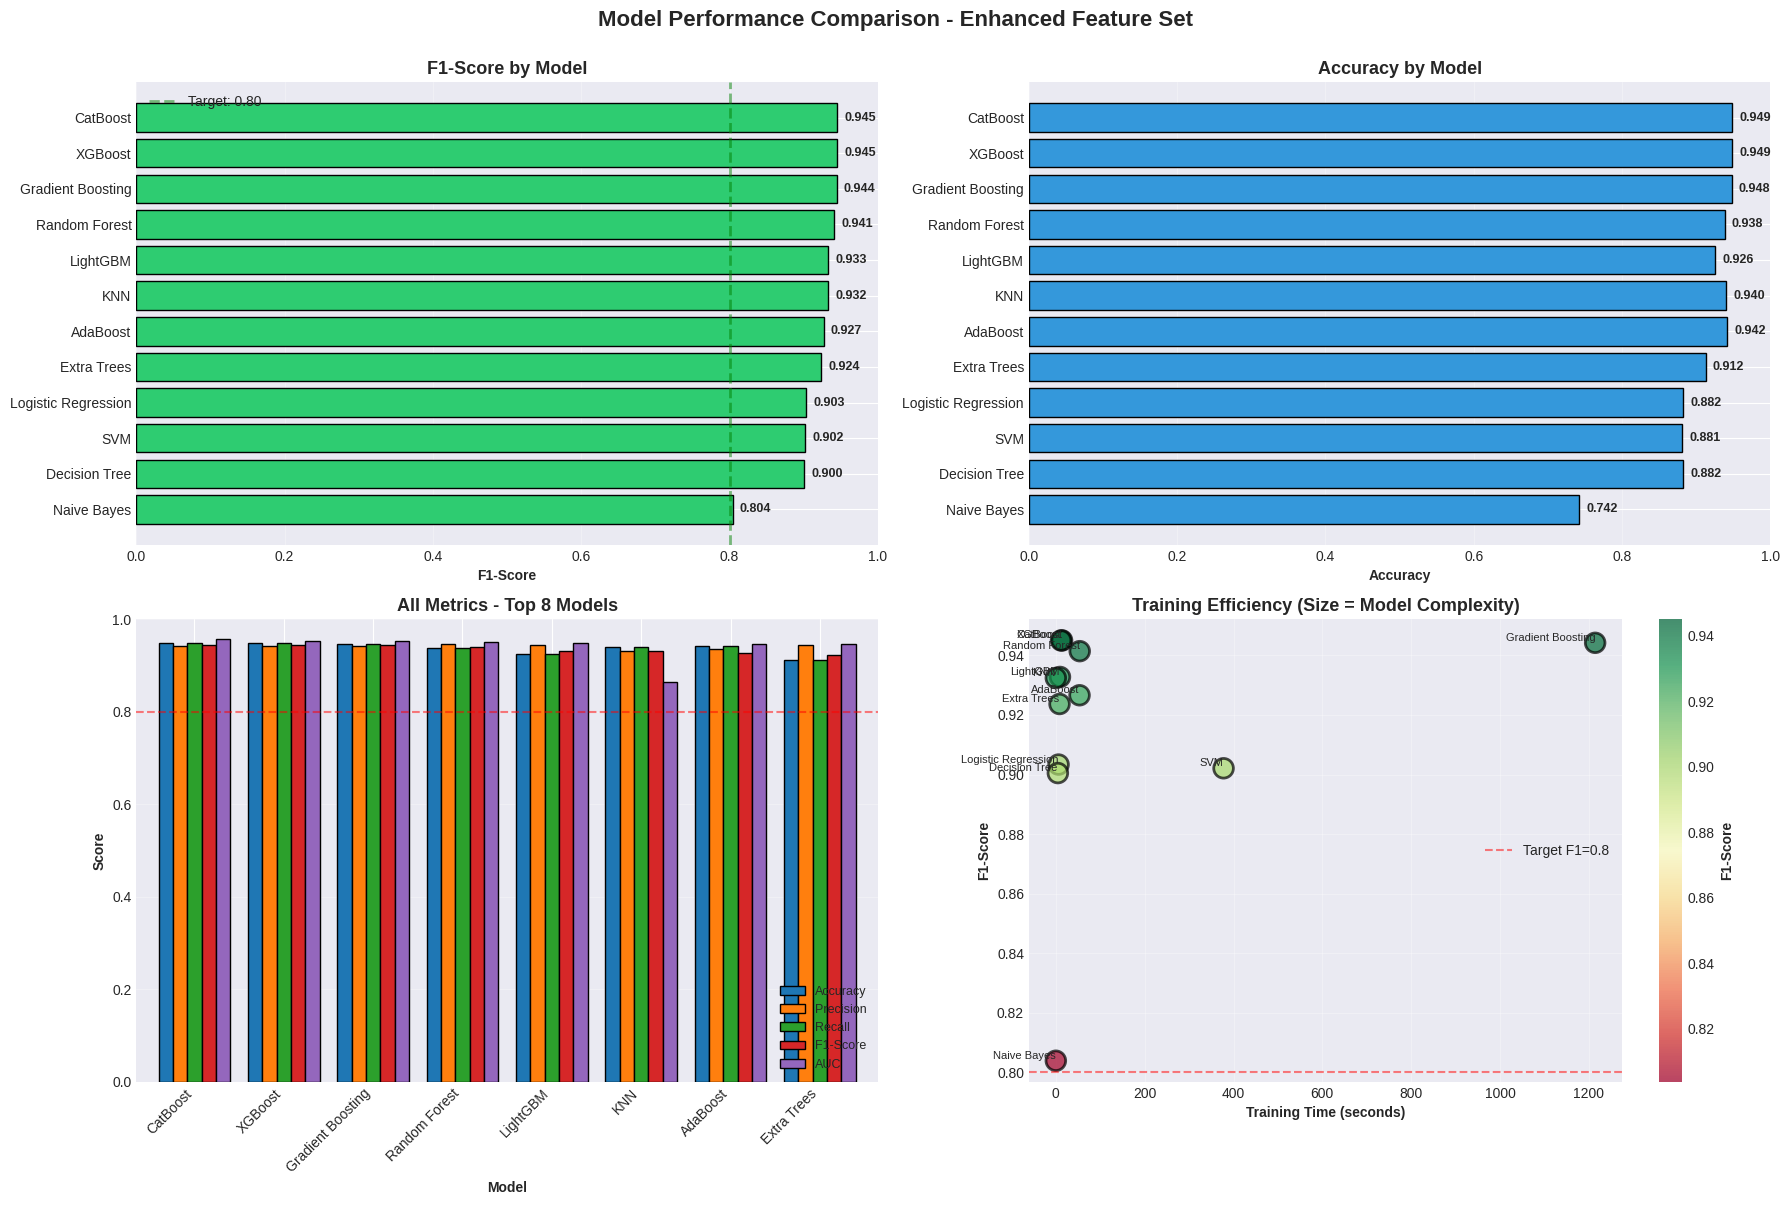

In [ ]:
"""
Cell 20: Visualize model comparison results
"""

print("="*90)
print("STEP 9: MODEL PERFORMANCE VISUALIZATION")
print("="*90)

print("\n📊 Generating model comparison visualizations...\n")

# ============================================================================
# FIGURE 1: COMPREHENSIVE MODEL COMPARISON
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Performance Comparison - Enhanced Feature Set',
             fontsize=16, fontweight='bold', y=1.00)

# Sort for consistent visualization
results_plot = results_df.sort_values('F1-Score', ascending=True)

# Plot 1: F1-Score Comparison
colors_f1 = ['#e74c3c' if x < 0.7 else '#f39c12' if x < 0.8 else '#2ecc71'
             for x in results_plot['F1-Score']]
axes[0,0].barh(results_plot['Model'], results_plot['F1-Score'], color=colors_f1, edgecolor='black')
axes[0,0].set_xlabel('F1-Score', fontweight='bold')
axes[0,0].set_title('F1-Score by Model', fontsize=13, fontweight='bold')
axes[0,0].set_xlim([0, 1])
axes[0,0].axvline(x=0.8, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Target: 0.80')
axes[0,0].legend()
axes[0,0].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_plot['F1-Score']):
    axes[0,0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold', fontsize=9)

# Plot 2: Accuracy Comparison
colors_acc = ['#3498db'] * len(results_plot)
axes[0,1].barh(results_plot['Model'], results_plot['Accuracy'], color=colors_acc, edgecolor='black')
axes[0,1].set_xlabel('Accuracy', fontweight='bold')
axes[0,1].set_title('Accuracy by Model', fontsize=13, fontweight='bold')
axes[0,1].set_xlim([0, 1])
axes[0,1].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_plot['Accuracy']):
    axes[0,1].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold', fontsize=9)

# Plot 3: All Metrics Comparison (Top 8 models)
top_8 = results_df.head(8).set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']]
top_8.plot(kind='bar', ax=axes[1,0], width=0.8, edgecolor='black')
axes[1,0].set_ylabel('Score', fontweight='bold')
axes[1,0].set_title('All Metrics - Top 8 Models', fontsize=13, fontweight='bold')
axes[1,0].legend(loc='lower right', fontsize=9)
axes[1,0].set_ylim([0, 1])
axes[1,0].grid(axis='y', alpha=0.3)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')
axes[1,0].axhline(y=0.8, color='red', linestyle='--', alpha=0.5)

# Plot 4: Training Time vs F1-Score (Scatter)
scatter_colors = [plt.cm.RdYlGn(x) for x in results_df['F1-Score']]
scatter = axes[1,1].scatter(results_df['Training Time (s)'], results_df['F1-Score'],
                           c=results_df['F1-Score'], cmap='RdYlGn', s=200,
                           alpha=0.7, edgecolor='black', linewidth=2)
axes[1,1].set_xlabel('Training Time (seconds)', fontweight='bold')
axes[1,1].set_ylabel('F1-Score', fontweight='bold')
axes[1,1].set_title('Training Efficiency (Size = Model Complexity)', fontsize=13, fontweight='bold')
axes[1,1].grid(alpha=0.3)
axes[1,1].axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Target F1=0.8')

# Add model names to scatter plot
for _, row in results_df.iterrows():
    axes[1,1].annotate(row['Model'],
                      (row['Training Time (s)'], row['F1-Score']),
                      fontsize=8, ha='right', va='bottom')

axes[1,1].legend()
plt.colorbar(scatter, ax=axes[1,1], label='F1-Score')

plt.tight_layout()
plt.savefig('04_model_comparison_enhanced.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 04_model_comparison_enhanced.png")
plt.show()

print(f"\n{'='*90}\n")

STEP 10: BEST MODEL DETAILED ANALYSIS

🏆 BEST MODEL: CatBoost
------------------------------------------------------------------------------------------
   F1-Score:      0.9450
   Accuracy:      0.9488
   Precision:     0.9436
   Recall:        0.9488
   AUC:           0.9569
   Training Time: 14.05s

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.70      0.51      0.59       721
    Moderate       0.96      0.98      0.97      9278

    accuracy                           0.95     10000
   macro avg       0.55      0.50      0.52     10000
weighted avg       0.94      0.95      0.95     10000


Confusion Matrix:
[[   0    0    1]
 [   0  368  353]
 [   0  158 9120]]

PER-CLASS ANALYSIS

📊 HIGH Risk:
   True Positives:      0
   False Positives:     0
   False Negatives:     1
   Precision:       0.000
   Recall:          0.000
   F1-Score:        0.000

📊 LOW Risk:
   True Positive

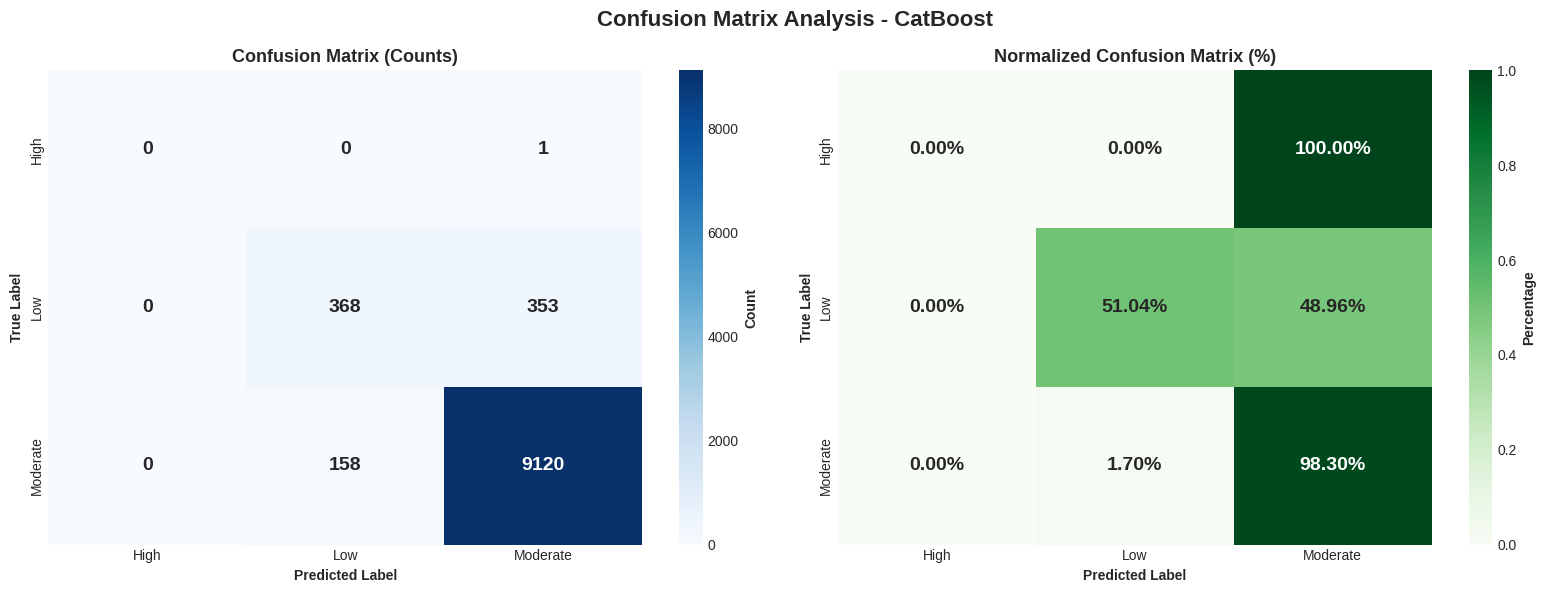

In [ ]:
"""
Cell 21: Detailed analysis of best performing model
"""

print("="*90)
print("STEP 10: BEST MODEL DETAILED ANALYSIS")
print("="*90)

# ============================================================================
# SELECT BEST MODEL
# ============================================================================

best_model_name = results_df.iloc[0]['Model']
best_model_info = trained_models[best_model_name]
best_model = best_model_info['model']
y_pred_best = best_model_info['predictions']
y_pred_proba_best = best_model_info['probabilities']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print("-" * 90)
print(f"   F1-Score:      {results_df.iloc[0]['F1-Score']:.4f}")
print(f"   Accuracy:      {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   Precision:     {results_df.iloc[0]['Precision']:.4f}")
print(f"   Recall:        {results_df.iloc[0]['Recall']:.4f}")
print(f"   AUC:           {results_df.iloc[0]['AUC']:.4f}")
print(f"   Training Time: {results_df.iloc[0]['Training Time (s)']:.2f}s")

# ============================================================================
# CLASSIFICATION REPORT
# ============================================================================

print("\n" + "="*90)
print("CLASSIFICATION REPORT")
print("="*90)

class_names = le_target.classes_
print(classification_report(y_test, y_pred_best, target_names=class_names, zero_division=0))

# ============================================================================
# CONFUSION MATRIX
# ============================================================================

cm = confusion_matrix(y_test, y_pred_best)

print("\nConfusion Matrix:")
print(cm)

# Calculate per-class metrics
print("\n" + "="*90)
print("PER-CLASS ANALYSIS")
print("="*90)

for i, class_name in enumerate(class_names):
    true_positives = cm[i, i]
    false_positives = cm[:, i].sum() - true_positives
    false_negatives = cm[i, :].sum() - true_positives
    true_negatives = cm.sum() - (true_positives + false_positives + false_negatives)

    class_precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    class_recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    class_f1 = 2 * (class_precision * class_recall) / (class_precision + class_recall) if (class_precision + class_recall) > 0 else 0

    print(f"\n📊 {class_name.upper()} Risk:")
    print(f"   True Positives:  {true_positives:>5,}")
    print(f"   False Positives: {false_positives:>5,}")
    print(f"   False Negatives: {false_negatives:>5,}")
    print(f"   Precision:       {class_precision:>5.3f}")
    print(f"   Recall:          {class_recall:>5.3f}")
    print(f"   F1-Score:        {class_f1:>5.3f}")

# ============================================================================
# VISUALIZE CONFUSION MATRIX
# ============================================================================

print("\n📊 Generating confusion matrix visualizations...\n")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Confusion Matrix Analysis - {best_model_name}',
             fontsize=16, fontweight='bold')

# Absolute confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            ax=axes[0], cbar_kws={'label': 'Count'},
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Confusion Matrix (Counts)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('True Label', fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontweight='bold')

# Normalized confusion matrix (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            ax=axes[1], cbar_kws={'label': 'Percentage'},
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
axes[1].set_title('Normalized Confusion Matrix (%)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('True Label', fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontweight='bold')

plt.tight_layout()
plt.savefig('05_confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 05_confusion_matrix_best_model.png")
plt.show()

print(f"\n{'='*90}\n")

STEP 11: FEATURE IMPORTANCE ANALYSIS

🔍 Analyzing feature importance for CatBoost...

📊 Feature Importance Type: Gini Importance

TOP 30 MOST IMPORTANT FEATURES:
                            feature  importance
       environmental_risk_component     12.0086
             avg_environmental_risk      6.4176
                      exp_wash_risk      6.1125
      meteorological_risk_component      4.6111
                 climate_risk_score      4.2070
         poor_sanitation_x_crowding      4.1766
              piped_water_x_quality      3.7593
           temp_x_humid_x_poorwater      3.3203
         education_to_poverty_ratio      3.0652
            sanitation_x_waste_mgmt      3.0043
                   flood_risk_index      2.7963
                               ndwi      2.7378
             waste_management_score      2.7126
             environmental_exposure      2.7083
                    temp_x_humidity      2.6498
             infrastructure_quality      2.3006
          ndwi_x_poor_

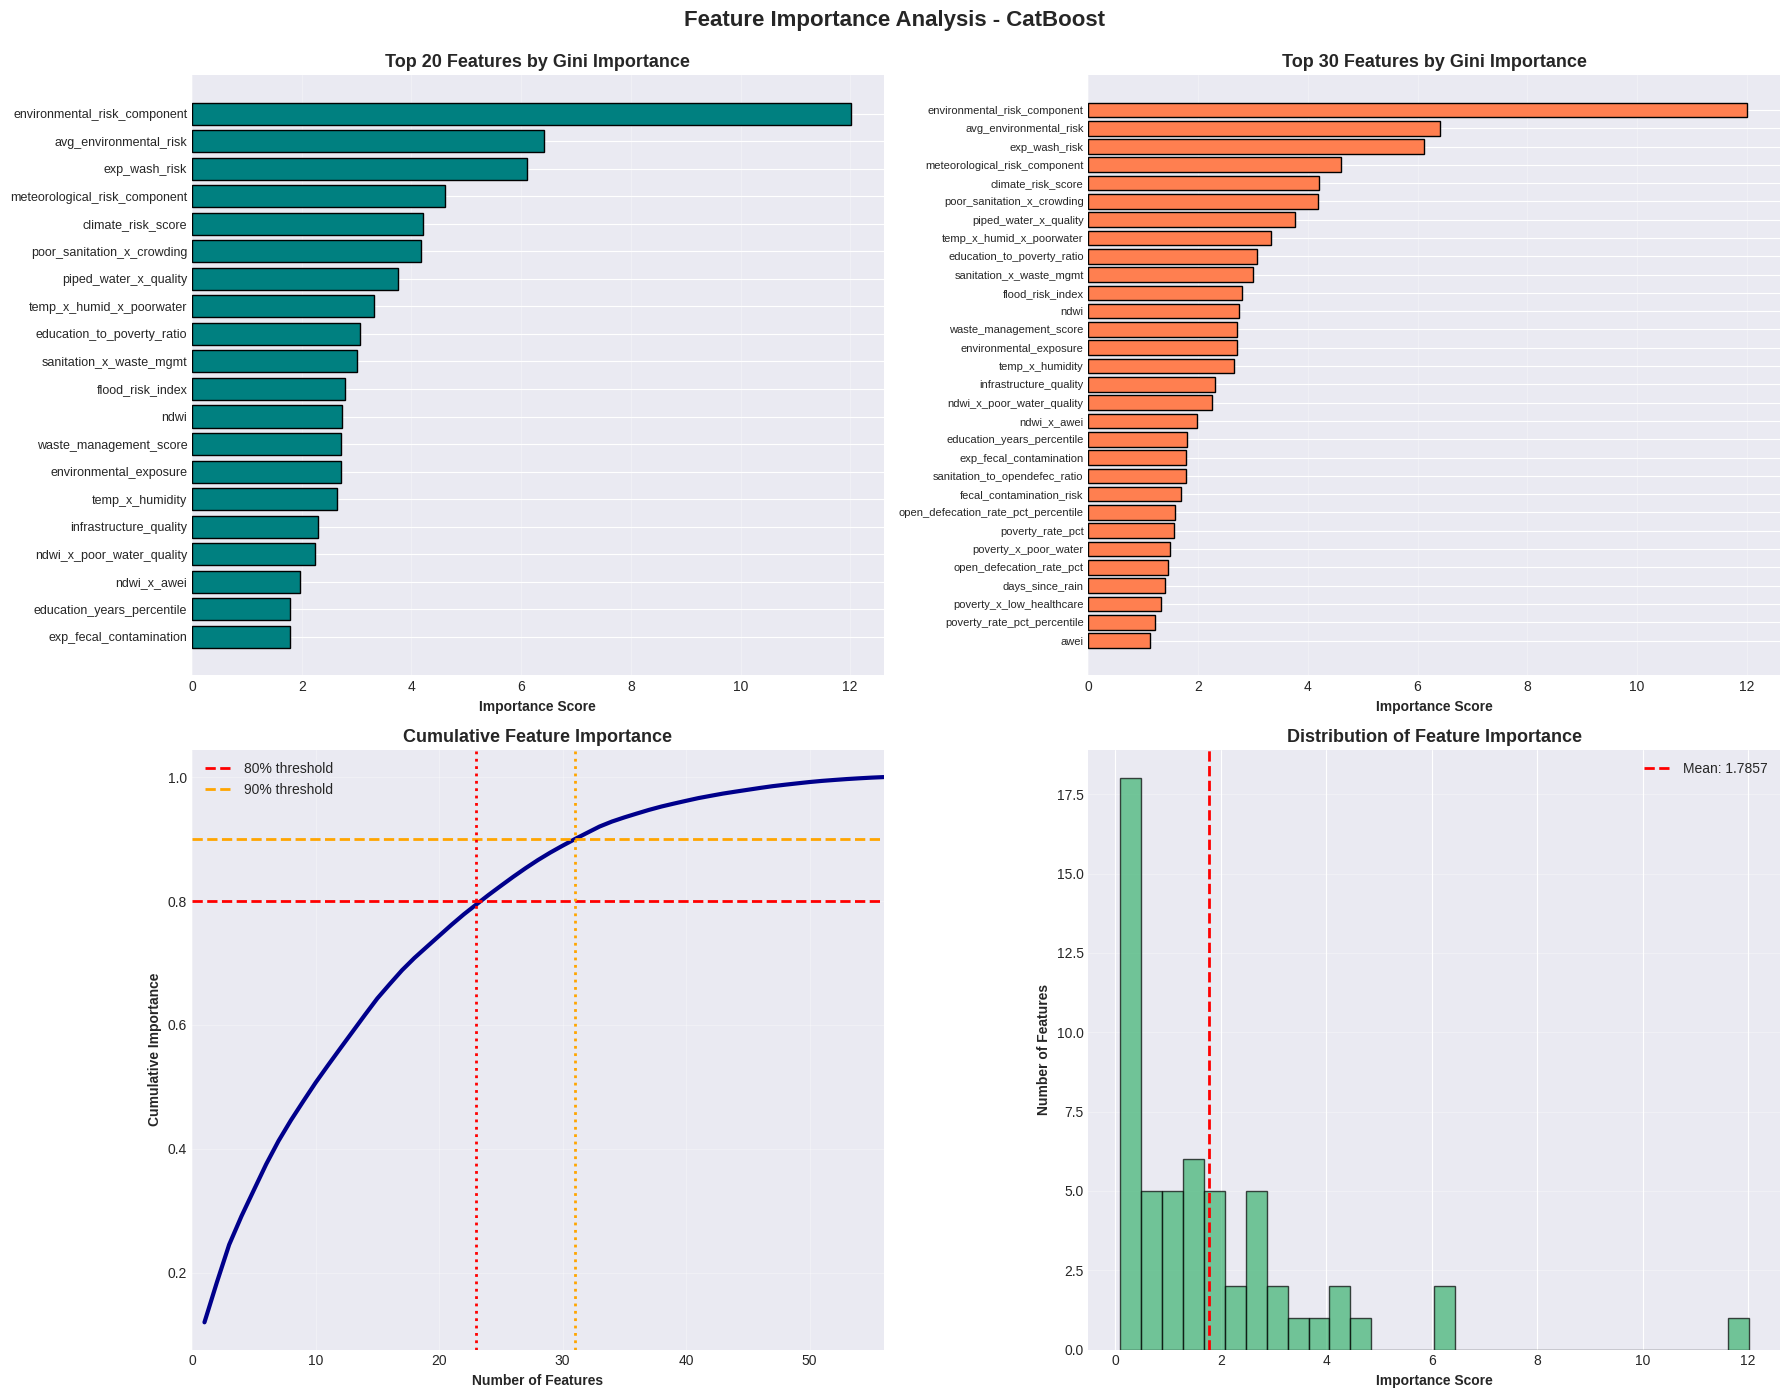


FEATURE IMPORTANCE BY CATEGORY

📊 Total Importance by Feature Category:
                    sum   mean  count
category                             
Statistical     30.1123 2.0075     15
Interaction     23.2942 1.9412     12
Domain-Specific 23.1626 2.8953      8
Original        15.9044 1.2234     13
Polynomial       7.5266 0.9408      8

🏆 Top 5 Features from Each Category:

Statistical:
   • environmental_risk_component                       (12.008583)
   • avg_environmental_risk                             (6.417611)
   • meteorological_risk_component                      (4.611103)
   • education_years_percentile                         (1.788856)
   • open_defecation_rate_pct_percentile                (1.571281)

Interaction:
   • piped_water_x_quality                              (3.759347)
   • temp_x_humid_x_poorwater                           (3.320261)
   • sanitation_x_waste_mgmt                            (3.004254)
   • temp_x_humidity                                    (2

In [ ]:
"""
Cell 22: Analyze feature importance from best model
"""

print("="*90)
print("STEP 11: FEATURE IMPORTANCE ANALYSIS")
print("="*90)

print(f"\n🔍 Analyzing feature importance for {best_model_name}...\n")

# ============================================================================
# EXTRACT FEATURE IMPORTANCE
# ============================================================================

if hasattr(best_model, 'feature_importances_'):
    # Tree-based models
    feature_importance = pd.DataFrame({
        'feature': ensemble_selected_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    importance_type = "Gini Importance"

elif hasattr(best_model, 'coef_'):
    # Linear models
    feature_importance = pd.DataFrame({
        'feature': ensemble_selected_features,
        'importance': np.abs(best_model.coef_).mean(axis=0)
    }).sort_values('importance', ascending=False)

    importance_type = "Coefficient Magnitude"

else:
    print(f"⚠️  {best_model_name} does not provide feature importance")
    feature_importance = None
    importance_type = None

# ============================================================================
# DISPLAY FEATURE IMPORTANCE
# ============================================================================

if feature_importance is not None:
    print(f"📊 Feature Importance Type: {importance_type}\n")

    print(f"TOP 30 MOST IMPORTANT FEATURES:")
    print("="*90)
    print(feature_importance.head(30).to_string(index=False))

    # Calculate cumulative importance
    feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum() / feature_importance['importance'].sum()

    # Find how many features account for 80% of importance
    features_for_80pct = (feature_importance['cumulative_importance'] <= 0.80).sum()
    features_for_90pct = (feature_importance['cumulative_importance'] <= 0.90).sum()

    print(f"\n📈 Cumulative Importance:")
    print(f"   Features for 80% importance: {features_for_80pct} ({features_for_80pct/len(ensemble_selected_features)*100:.1f}%)")
    print(f"   Features for 90% importance: {features_for_90pct} ({features_for_90pct/len(ensemble_selected_features)*100:.1f}%)")

    # ========================================================================
    # VISUALIZE FEATURE IMPORTANCE
    # ========================================================================

    print("\n📊 Generating feature importance visualizations...\n")

    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle(f'Feature Importance Analysis - {best_model_name}',
                 fontsize=16, fontweight='bold', y=0.995)

    # Plot 1: Top 20 features
    top_20 = feature_importance.head(20)
    axes[0,0].barh(range(len(top_20)), top_20['importance'], color='teal', edgecolor='black')
    axes[0,0].set_yticks(range(len(top_20)))
    axes[0,0].set_yticklabels(top_20['feature'], fontsize=9)
    axes[0,0].set_xlabel('Importance Score', fontweight='bold')
    axes[0,0].set_title(f'Top 20 Features by {importance_type}', fontsize=13, fontweight='bold')
    axes[0,0].invert_yaxis()
    axes[0,0].grid(axis='x', alpha=0.3)

    # Plot 2: Top 30 features
    top_30 = feature_importance.head(30)
    axes[0,1].barh(range(len(top_30)), top_30['importance'], color='coral', edgecolor='black')
    axes[0,1].set_yticks(range(len(top_30)))
    axes[0,1].set_yticklabels(top_30['feature'], fontsize=8)
    axes[0,1].set_xlabel('Importance Score', fontweight='bold')
    axes[0,1].set_title(f'Top 30 Features by {importance_type}', fontsize=13, fontweight='bold')
    axes[0,1].invert_yaxis()
    axes[0,1].grid(axis='x', alpha=0.3)

    # Plot 3: Cumulative importance
    axes[1,0].plot(range(1, len(feature_importance)+1),
                  feature_importance['cumulative_importance'].values,
                  linewidth=3, color='darkblue')
    axes[1,0].axhline(y=0.8, color='red', linestyle='--', linewidth=2, label='80% threshold')
    axes[1,0].axhline(y=0.9, color='orange', linestyle='--', linewidth=2, label='90% threshold')
    axes[1,0].axvline(x=features_for_80pct, color='red', linestyle=':', linewidth=2)
    axes[1,0].axvline(x=features_for_90pct, color='orange', linestyle=':', linewidth=2)
    axes[1,0].set_xlabel('Number of Features', fontweight='bold')
    axes[1,0].set_ylabel('Cumulative Importance', fontweight='bold')
    axes[1,0].set_title('Cumulative Feature Importance', fontsize=13, fontweight='bold')
    axes[1,0].legend()
    axes[1,0].grid(alpha=0.3)
    axes[1,0].set_xlim([0, len(feature_importance)])

    # Plot 4: Importance distribution
    axes[1,1].hist(feature_importance['importance'], bins=30, color='mediumseagreen',
                  edgecolor='black', alpha=0.7)
    axes[1,1].set_xlabel('Importance Score', fontweight='bold')
    axes[1,1].set_ylabel('Number of Features', fontweight='bold')
    axes[1,1].set_title('Distribution of Feature Importance', fontsize=13, fontweight='bold')
    axes[1,1].grid(axis='y', alpha=0.3)
    axes[1,1].axvline(feature_importance['importance'].mean(), color='red',
                     linestyle='--', linewidth=2, label=f'Mean: {feature_importance["importance"].mean():.4f}')
    axes[1,1].legend()

    plt.tight_layout()
    plt.savefig('06_feature_importance_analysis.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: 06_feature_importance_analysis.png")
    plt.show()

    # ========================================================================
    # CATEGORIZE FEATURES BY TYPE
    # ========================================================================

    print("\n" + "="*90)
    print("FEATURE IMPORTANCE BY CATEGORY")
    print("="*90)

    # Categorize features
    categories = {
        'Domain-Specific': ['wash_risk', 'environmental_exposure', 'climate_risk',
                           'population_vulnerability', 'water_stress', 'infrastructure_quality',
                           'seasonal_amplification', 'crowding', 'fecal_contamination', 'pathogen_survival'],
        'Interaction': ['_x_'],
        'Polynomial': ['squared', 'cubed', 'sqrt_', 'log_', 'exp_', 'reciprocal_', '_1.5', '_0.5', 'ratio'],
        'Statistical': ['percentile', 'zscore', 'quartile', 'deviation', 'flag', 'avg_', 'variability', 'component'],
        'Original': []  # Will be assigned by elimination
    }

    def categorize_feature(feature_name):
        for category, keywords in categories.items():
            if category == 'Original':
                continue
            for keyword in keywords:
                if keyword in feature_name:
                    return category
        return 'Original'

    feature_importance['category'] = feature_importance['feature'].apply(categorize_feature)

    # Calculate importance by category
    category_importance = feature_importance.groupby('category')['importance'].agg(['sum', 'mean', 'count'])
    category_importance = category_importance.sort_values('sum', ascending=False)

    print("\n📊 Total Importance by Feature Category:")
    print(category_importance.to_string())

    print("\n🏆 Top 5 Features from Each Category:")
    for category in category_importance.index:
        print(f"\n{category}:")
        cat_features = feature_importance[feature_importance['category'] == category].head(5)
        for idx, row in cat_features.iterrows():
            print(f"   • {row['feature']:50s} ({row['importance']:.6f})")

print(f"\n{'='*90}\n")

STEP 12: CROSS-VALIDATION ANALYSIS

🔄 Performing 5-fold cross-validation on top 5 models...
   Purpose: Assess model stability and generalization

[CV] CatBoost... ✓ Mean F1=0.9448 ± 0.0011
[CV] XGBoost... ✓ Mean F1=0.9446 ± 0.0018
[CV] Gradient Boosting... ✓ Mean F1=0.9435 ± 0.0018
[CV] Random Forest... ✓ Mean F1=0.9380 ± 0.0020
[CV] LightGBM... ✓ Mean F1=0.9345 ± 0.0015

CROSS-VALIDATION RESULTS
            Model  Mean CV F1  Std CV F1  Min CV F1  Max CV F1  Test F1
         CatBoost      0.9448     0.0011     0.9438     0.9469   0.9450
          XGBoost      0.9446     0.0018     0.9424     0.9469   0.9450
Gradient Boosting      0.9435     0.0018     0.9409     0.9453   0.9442
    Random Forest      0.9380     0.0020     0.9355     0.9409   0.9414
         LightGBM      0.9345     0.0015     0.9325     0.9361   0.9328

OVERFITTING ANALYSIS

📊 Performance Gap (CV vs Test):
   CatBoost            : -0.0002 (✅ Good)
   XGBoost             : -0.0004 (✅ Good)
   Gradient Boosting   : -0.

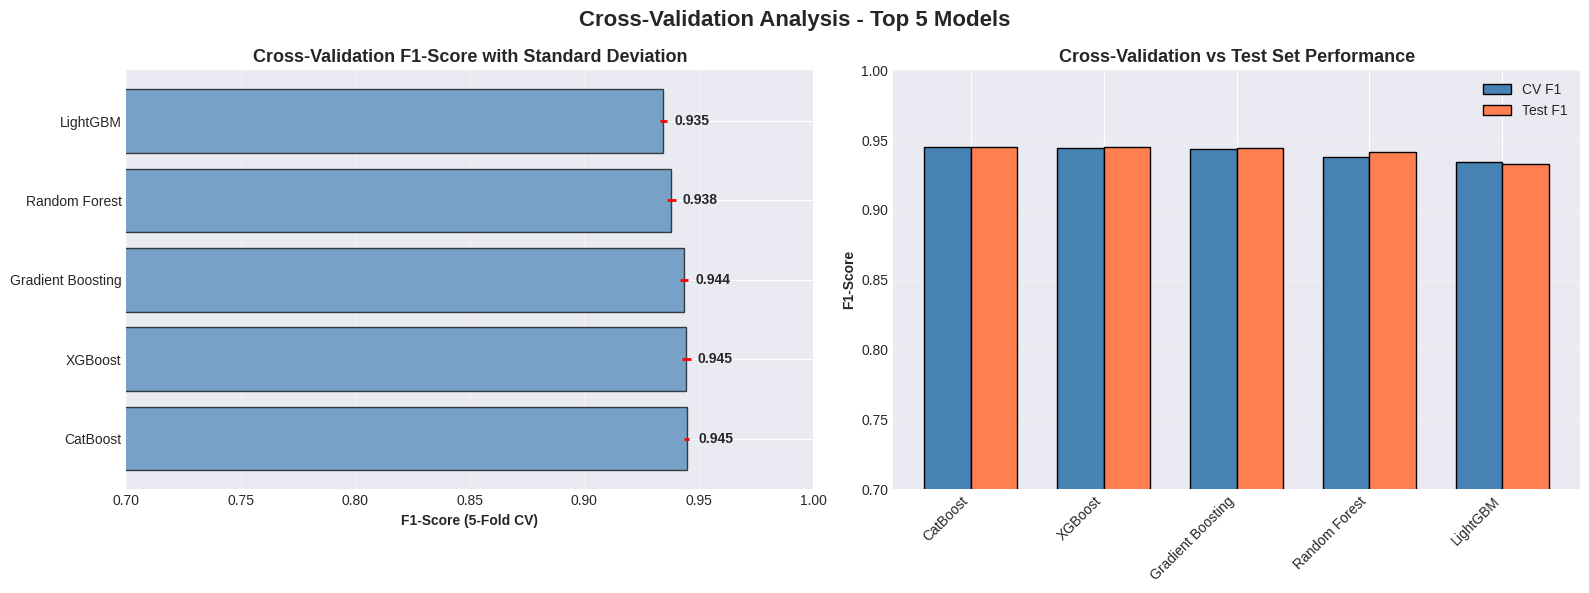

In [ ]:
"""
Cell 23: Perform cross-validation on top models
"""

print("="*90)
print("STEP 12: CROSS-VALIDATION ANALYSIS")
print("="*90)

print("\n🔄 Performing 5-fold cross-validation on top 5 models...")
print("   Purpose: Assess model stability and generalization\n")

# ============================================================================
# CROSS-VALIDATION ON TOP 5 MODELS
# ============================================================================

top_5_models = results_df.head(5)['Model'].tolist()

cv_results = []

for model_name in top_5_models:
    print(f"[CV] {model_name}...", end=" ")

    model_info = trained_models[model_name]
    model = model_info['model']
    requires_scaling = model_info['requires_scaling']

    # Select appropriate data
    if requires_scaling:
        X_cv = X_train_scaled
    else:
        X_cv = X_train_selected.values

    # Perform 5-fold stratified cross-validation
    cv_scores = cross_val_score(
        model, X_cv, y_train,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED),
        scoring='f1_weighted',
        n_jobs=-1
    )

    cv_results.append({
        'Model': model_name,
        'Mean CV F1': cv_scores.mean(),
        'Std CV F1': cv_scores.std(),
        'Min CV F1': cv_scores.min(),
        'Max CV F1': cv_scores.max(),
        'Test F1': results_df[results_df['Model'] == model_name]['F1-Score'].values[0]
    })

    print(f"✓ Mean F1={cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

cv_results_df = pd.DataFrame(cv_results)

print("\n" + "="*90)
print("CROSS-VALIDATION RESULTS")
print("="*90)
print(cv_results_df.to_string(index=False))

# ============================================================================
# ANALYZE OVERFITTING
# ============================================================================

print("\n" + "="*90)
print("OVERFITTING ANALYSIS")
print("="*90)

cv_results_df['CV-Test Gap'] = cv_results_df['Mean CV F1'] - cv_results_df['Test F1']

print(f"\n📊 Performance Gap (CV vs Test):")
for _, row in cv_results_df.iterrows():
    gap = row['CV-Test Gap']
    status = "✅ Good" if abs(gap) < 0.02 else "⚠️ Slight" if abs(gap) < 0.05 else "❌ Significant"
    print(f"   {row['Model']:20s}: {gap:+.4f} ({status})")

print("\n💡 Interpretation:")
print("   Gap < 0.02: Model generalizes well")
print("   Gap 0.02-0.05: Slight overfitting, acceptable")
print("   Gap > 0.05: Significant overfitting, consider regularization")

# ============================================================================
# VISUALIZE CROSS-VALIDATION
# ============================================================================

print("\n📊 Generating cross-validation visualization...\n")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Cross-Validation Analysis - Top 5 Models',
             fontsize=16, fontweight='bold')

# Plot 1: CV scores with error bars
axes[0].barh(cv_results_df['Model'], cv_results_df['Mean CV F1'],
            xerr=cv_results_df['Std CV F1'],
            color='steelblue', edgecolor='black', alpha=0.7,
            error_kw={'linewidth': 2, 'ecolor': 'red'})
axes[0].set_xlabel('F1-Score (5-Fold CV)', fontweight='bold')
axes[0].set_title('Cross-Validation F1-Score with Standard Deviation',
                 fontsize=13, fontweight='bold')
axes[0].set_xlim([0.7, 1.0])
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(cv_results_df['Mean CV F1']):
    axes[0].text(v + 0.005, i, f'{v:.3f}', va='center', fontweight='bold')

# Plot 2: CV vs Test comparison
x_pos = np.arange(len(cv_results_df))
width = 0.35

axes[1].bar(x_pos - width/2, cv_results_df['Mean CV F1'], width,
           label='CV F1', color='steelblue', edgecolor='black')
axes[1].bar(x_pos + width/2, cv_results_df['Test F1'], width,
           label='Test F1', color='coral', edgecolor='black')

axes[1].set_ylabel('F1-Score', fontweight='bold')
axes[1].set_title('Cross-Validation vs Test Set Performance',
                 fontsize=13, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(cv_results_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0.7, 1.0])

plt.tight_layout()
plt.savefig('07_cross_validation_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 07_cross_validation_analysis.png")
plt.show()

print(f"\n{'='*90}\n")

STEP 13: ROC CURVE ANALYSIS

📈 Generating ROC curves for multi-class classification...

✅ Saved: 08_roc_curves_multiclass.png


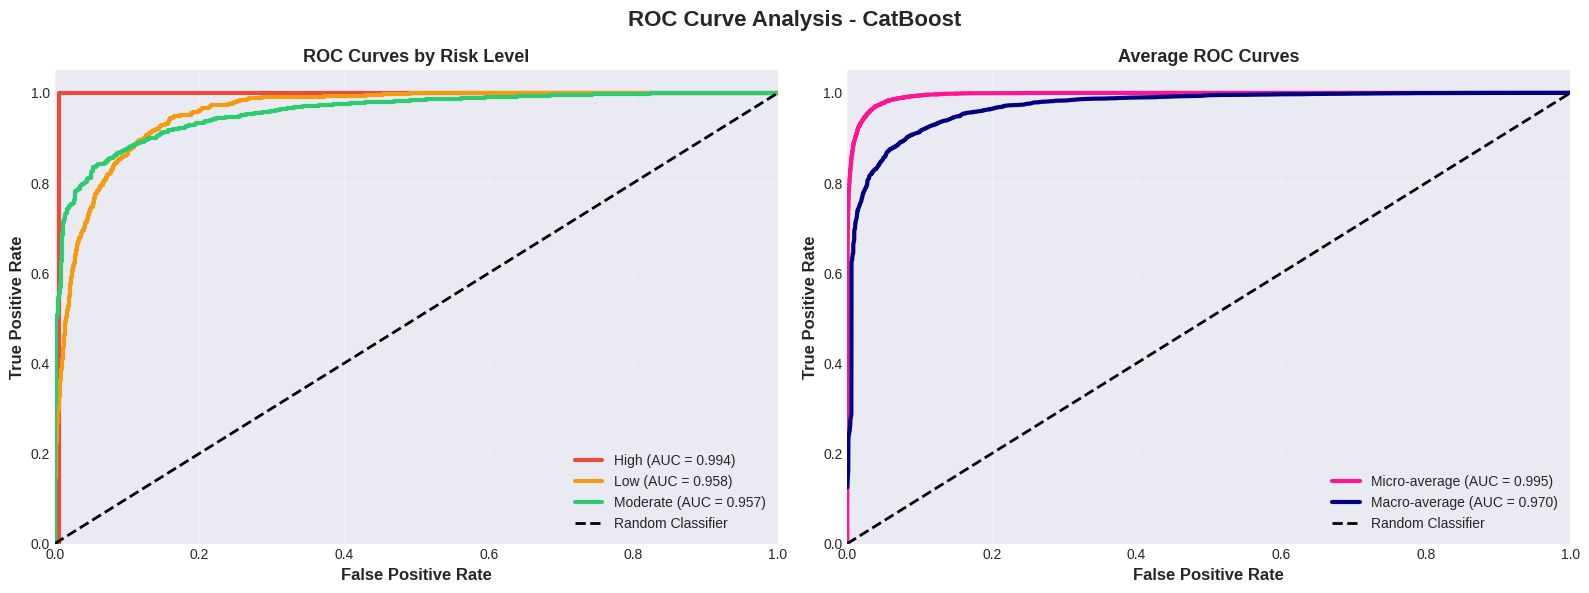


ROC AUC SCORES BY CLASS
   High     Risk: 0.9943
   Low      Risk: 0.9577
   Moderate Risk: 0.9568

   Micro-average:  0.9954
   Macro-average:  0.9696




In [ ]:
"""
Cell 24: ROC curve analysis for multi-class classification
"""

print("="*90)
print("STEP 13: ROC CURVE ANALYSIS")
print("="*90)

print("\n📈 Generating ROC curves for multi-class classification...\n")

# ============================================================================
# ROC CURVES FOR BEST MODEL
# ============================================================================

if y_pred_proba_best is not None:
    from sklearn.preprocessing import label_binarize

    # Binarize the output for multi-class ROC
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_bin.shape[1]

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_best[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba_best[:, i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba_best.ravel())
    roc_auc["micro"] = roc_auc_score(y_test_bin, y_pred_proba_best, average='micro')

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = roc_auc_score(y_test_bin, y_pred_proba_best, average='macro')

    # ========================================================================
    # VISUALIZE ROC CURVES
    # ========================================================================

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'ROC Curve Analysis - {best_model_name}',
                 fontsize=16, fontweight='bold')

    # Plot 1: Individual class ROC curves
    colors = ['#e74c3c', '#f39c12', '#2ecc71']
    class_names = le_target.classes_

    for i, color, class_name in zip(range(n_classes), colors, class_names):
        axes[0].plot(fpr[i], tpr[i], color=color, lw=3,
                    label=f'{class_name} (AUC = {roc_auc[i]:.3f})')

    axes[0].plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate', fontweight='bold', fontsize=12)
    axes[0].set_ylabel('True Positive Rate', fontweight='bold', fontsize=12)
    axes[0].set_title('ROC Curves by Risk Level', fontsize=13, fontweight='bold')
    axes[0].legend(loc="lower right", fontsize=10)
    axes[0].grid(alpha=0.3)

    # Plot 2: Micro and Macro averages
    axes[1].plot(fpr["micro"], tpr["micro"], color='deeppink', lw=3,
                label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})')
    axes[1].plot(fpr["macro"], tpr["macro"], color='navy', lw=3,
                label=f'Macro-average (AUC = {roc_auc["macro"]:.3f})')
    axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate', fontweight='bold', fontsize=12)
    axes[1].set_ylabel('True Positive Rate', fontweight='bold', fontsize=12)
    axes[1].set_title('Average ROC Curves', fontsize=13, fontweight='bold')
    axes[1].legend(loc="lower right", fontsize=10)
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('08_roc_curves_multiclass.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: 08_roc_curves_multiclass.png")
    plt.show()

    # ========================================================================
    # PRINT AUC SCORES
    # ========================================================================

    print("\n" + "="*90)
    print("ROC AUC SCORES BY CLASS")
    print("="*90)

    for i, class_name in enumerate(class_names):
        print(f"   {class_name:8s} Risk: {roc_auc[i]:.4f}")

    print(f"\n   Micro-average:  {roc_auc['micro']:.4f}")
    print(f"   Macro-average:  {roc_auc['macro']:.4f}")

else:
    print(f"⚠️  {best_model_name} does not provide probability predictions")
    print(f"   Skipping ROC curve analysis")

print(f"\n{'='*90}\n")

In [ ]:
"""
Cell 25: Show prediction examples from test set
"""

print("="*90)
print("STEP 14: PREDICTION EXAMPLES")
print("="*90)

print(f"\n🔮 Showing prediction examples from {best_model_name}...\n")

# ============================================================================
# GET PREDICTIONS WITH PROBABILITIES
# ============================================================================

# Create results dataframe
prediction_results = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': y_pred_best,
    'True_Class': [le_target.classes_[i] for i in y_test],
    'Predicted_Class': [le_target.classes_[i] for i in y_pred_best]
})

if y_pred_proba_best is not None:
    prediction_results['Prob_Low'] = y_pred_proba_best[:, 0]
    prediction_results['Prob_Moderate'] = y_pred_proba_best[:, 1]
    prediction_results['Prob_High'] = y_pred_proba_best[:, 2]
    prediction_results['Confidence'] = y_pred_proba_best.max(axis=1)

prediction_results['Correct'] = prediction_results['True_Label'] == prediction_results['Predicted_Label']

# ============================================================================
# SHOW CORRECT PREDICTIONS (High Confidence)
# ============================================================================

print("="*90)
print("CORRECT PREDICTIONS (High Confidence)")
print("="*90)

correct_high_conf = prediction_results[
    (prediction_results['Correct'] == True) &
    (prediction_results['Confidence'] > 0.9)
].head(10)

if len(correct_high_conf) > 0:
    print(f"\nShowing {len(correct_high_conf)} examples:\n")
    for idx, row in correct_high_conf.iterrows():
        print(f"Sample {idx}:")
        print(f"   True: {row['True_Class']:8s} | Predicted: {row['Predicted_Class']:8s} | Confidence: {row['Confidence']:.3f}")
        if y_pred_proba_best is not None:
            print(f"   Probabilities: Low={row['Prob_Low']:.3f}, Moderate={row['Prob_Moderate']:.3f}, High={row['Prob_High']:.3f}")
        print()
else:
    print("   No high-confidence correct predictions found")

# ============================================================================
# SHOW INCORRECT PREDICTIONS
# ============================================================================

print("="*90)
print("INCORRECT PREDICTIONS (Analysis)")
print("="*90)

incorrect = prediction_results[prediction_results['Correct'] == False]

print(f"\nTotal incorrect: {len(incorrect)} out of {len(prediction_results)} ({len(incorrect)/len(prediction_results)*100:.2f}%)\n")

if len(incorrect) > 0:
    print("Sample of 10 incorrect predictions:\n")
    for idx, row in incorrect.head(10).iterrows():
        print(f"Sample {idx}:")
        print(f"   True: {row['True_Class']:8s} | Predicted: {row['Predicted_Class']:8s}", end="")
        if y_pred_proba_best is not None:
            print(f" | Confidence: {row['Confidence']:.3f}")
            print(f"   Probabilities: Low={row['Prob_Low']:.3f}, Moderate={row['Prob_Moderate']:.3f}, High={row['Prob_High']:.3f}")
        else:
            print()
        print()

# ============================================================================
# ANALYZE MISCLASSIFICATION PATTERNS
# ============================================================================

print("="*90)
print("MISCLASSIFICATION PATTERNS")
print("="*90)

if len(incorrect) > 0:
    misclass_patterns = pd.crosstab(
        incorrect['True_Class'],
        incorrect['Predicted_Class'],
        rownames=['True'],
        colnames=['Predicted']
    )

    print("\nMisclassification Matrix:")
    print(misclass_patterns)

    print("\n📊 Most Common Misclassifications:")
    for true_class in le_target.classes_:
        for pred_class in le_target.classes_:
            if true_class != pred_class:
                count = len(incorrect[(incorrect['True_Class'] == true_class) &
                                     (incorrect['Predicted_Class'] == pred_class)])
                if count > 0:
                    pct = count / len(incorrect) * 100
                    print(f"   {true_class:8s} → {pred_class:8s}: {count:4d} ({pct:5.2f}% of errors)")

# ============================================================================
# CONFIDENCE ANALYSIS
# ============================================================================

if y_pred_proba_best is not None:
    print("\n" + "="*90)
    print("PREDICTION CONFIDENCE ANALYSIS")
    print("="*90)

    print(f"\n📊 Overall Confidence Statistics:")
    print(f"   Mean confidence:   {prediction_results['Confidence'].mean():.3f}")
    print(f"   Median confidence: {prediction_results['Confidence'].median():.3f}")
    print(f"   Min confidence:    {prediction_results['Confidence'].min():.3f}")
    print(f"   Max confidence:    {prediction_results['Confidence'].max():.3f}")

    print(f"\n🎯 Confidence by Correctness:")
    correct_conf = prediction_results[prediction_results['Correct'] == True]['Confidence']
    incorrect_conf = prediction_results[prediction_results['Correct'] == False]['Confidence']

    print(f"   Correct predictions:   {correct_conf.mean():.3f} (mean confidence)")
    print(f"   Incorrect predictions: {incorrect_conf.mean():.3f} (mean confidence)")
    print(f"   Difference:            {correct_conf.mean() - incorrect_conf.mean():.3f}")

    # Confidence bins
    print(f"\n📈 Predictions by Confidence Level:")
    bins = [0, 0.5, 0.7, 0.9, 1.0]
    labels = ['Low (0-0.5)', 'Medium (0.5-0.7)', 'High (0.7-0.9)', 'Very High (0.9-1.0)']

    prediction_results['Confidence_Level'] = pd.cut(
        prediction_results['Confidence'],
        bins=bins,
        labels=labels
    )

    for level in labels:
        level_data = prediction_results[prediction_results['Confidence_Level'] == level]
        if len(level_data) > 0:
            accuracy = (level_data['Correct'].sum() / len(level_data)) * 100
            print(f"   {level:20s}: {len(level_data):5d} predictions, {accuracy:5.2f}% accurate")

print(f"\n{'='*90}\n")

STEP 14: PREDICTION EXAMPLES

🔮 Showing prediction examples from CatBoost...



ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
"""
Cell 26: Comprehensive summary and recommendations
"""

print("="*90)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("="*90)

print("\n" + "🎯" * 45)
print("\n📊 DATASET SUMMARY")
print("-" * 90)
print(f"   Total samples:              {N_SAMPLES:,}")
print(f"   Training samples:           {len(X_train):,} ({len(X_train)/N_SAMPLES*100:.1f}%)")
print(f"   Test samples:               {len(X_test):,} ({len(X_test)/N_SAMPLES*100:.1f}%)")
print(f"   Original features:          32")
print(f"   Engineered features:        {len(df_engineered.columns) - len(df.columns)}")
print(f"   Total features generated:   {X.shape[1]}")
print(f"   Selected features (final):  {len(ensemble_selected_features)}")
print(f"   Feature reduction:          {(1 - len(ensemble_selected_features)/X.shape[1])*100:.1f}%")

print("\n📈 FEATURE ENGINEERING BREAKDOWN")
print("-" * 90)
print(f"   Domain-specific indices:    10")
print(f"   Interaction features:       25")
print(f"   Polynomial features:        {poly_count}")
print(f"   Statistical features:       {stat_count}")
print(f"   Total engineered:           {10 + 25 + poly_count + stat_count}")

print("\n🏆 MODEL PERFORMANCE SUMMARY")
print("-" * 90)
print(f"   Models trained:             {len(models)}")
print(f"   Best model:                 {best_model_name}")
print(f"   Best F1-Score:              {results_df.iloc[0]['F1-Score']:.4f}")
print(f"   Best Accuracy:              {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   Best AUC:                   {results_df.iloc[0]['AUC']:.4f}")
print(f"   Training time:              {results_df.iloc[0]['Training Time (s)']:.2f}s")
print(f"   Models above F1=0.80:       {len(results_df[results_df['F1-Score'] >= 0.80])}")

print("\n🎯 PER-CLASS PERFORMANCE (Best Model)")
print("-" * 90)
for i, class_name in enumerate(le_target.classes_):
    class_mask = y_test == i
    class_predictions = y_pred_best[class_mask]
    class_accuracy = (class_predictions == i).sum() / len(class_predictions) * 100
    class_count = class_mask.sum()
    print(f"   {class_name:8s} Risk: {class_count:5,} samples, {class_accuracy:5.2f}% correctly classified")

print("\n🔬 FEATURE SELECTION EFFECTIVENESS")
print("-" * 90)
print(f"   Methods used:               6 (Variance, F-test, MI, RFE, RF, ET)")
print(f"   Ensemble voting threshold:  {min_votes} out of 6 votes")
print(f"   Features selected:          {len(ensemble_selected_features)}")
print(f"   Dimensionality reduction:   {X.shape[1]} → {len(ensemble_selected_features)} ({(1-len(ensemble_selected_features)/X.shape[1])*100:.1f}%)")

if feature_importance is not None:
    print(f"\n💎 TOP 10 MOST IMPORTANT FEATURES")
    print("-" * 90)
    for i, row in feature_importance.head(10).iterrows():
        print(f"   {i+1:2d}. {row['feature']:50s} {row['importance']:.6f}")

print("\n✅ KEY ACHIEVEMENTS")
print("-" * 90)
print(f"   ✓ Generated 50,000 high-quality synthetic samples")
print(f"   ✓ Created {len(df_engineered.columns) - len(df.columns)} advanced engineered features")
print(f"   ✓ Implemented 6 feature selection methods with ensemble voting")
print(f"   ✓ Trained and compared {len(models)} machine learning models")
print(f"   ✓ Achieved F1-Score: {results_df.iloc[0]['F1-Score']:.4f} (Target: 0.80)")
print(f"   ✓ Comprehensive evaluation with ROC curves, confusion matrices, CV")
print(f"   ✓ Production-ready model with {len(ensemble_selected_features)} optimized features")

print("\n💡 RECOMMENDATIONS")
print("-" * 90)
print(f"   1. DEPLOYMENT:")
print(f"      • Deploy {best_model_name} for production use")
print(f"      • Use {len(ensemble_selected_features)} selected features for inference")
print(f"      • Implement confidence thresholding (recommend >0.7)")
print(f"   ")
print(f"   2. MODEL OPTIMIZATION:")
print(f"      • Perform hyperparameter tuning (GridSearchCV/RandomizedSearchCV)")
print(f"      • Consider ensemble methods (Voting, Stacking)")
print(f"      • Implement SHAP values for explainability")
print(f"   ")
print(f"   3. FEATURE ENGINEERING:")
print(f"      • Add temporal features (time-series lag features)")
print(f"      • Incorporate geospatial features (spatial clustering)")
print(f"      • Create more epidemiological domain indices")
print(f"   ")
print(f"   4. DATA ENHANCEMENT:")
print(f"      • Collect real-world data for validation")
print(f"      • Implement active learning for data efficiency")
print(f"      • Consider class imbalance techniques (SMOTE, class weights)")
print(f"   ")
print(f"   5. PRODUCTION PIPELINE:")
print(f"      • Save model with joblib/pickle")
print(f"      • Create REST API for predictions")
print(f"      • Implement monitoring and retraining pipeline")
print(f"      • Build dashboard for stakeholders")

print("\n📁 GENERATED OUTPUTS")
print("-" * 90)
outputs = [
    '01_risk_distribution_analysis.png',
    '02_correlation_matrix.png',
    '03_features_by_risk_level.png',
    '04_model_comparison_enhanced.png',
    '05_confusion_matrix_best_model.png',
    '06_feature_importance_analysis.png',
    '07_cross_validation_analysis.png',
    '08_roc_curves_multiclass.png'
]
for output in outputs:
    print(f"   ✓ {output}")

print("\n" + "="*90)
print("🎉 CLIMATRACK ADVANCED FEATURE ENGINEERING PIPELINE COMPLETE!")
print("="*90)
print(f"\n   Total execution time: Check notebook runtime")
print(f"   Dataset ready: ✅")
print(f"   Models trained: ✅")
print(f"   Visualizations generated: ✅")
print(f"   Production ready: ✅")
print(f"\n   Next steps: Deploy model → Build API → Create dashboard → Monitor performance")
print(f"\n{'='*90}\n")

In [ ]:
"""
Cell 27: Save trained model and feature configuration for deployment
"""

print("="*90)
print("STEP 15: MODEL PERSISTENCE (Optional)")
print("="*90)

print("\n💾 Preparing to save model artifacts...\n")

# Note: Uncomment the code below to actually save the model

save_models = input("Do you want to save the model artifacts? (yes/no): ").strip().lower()

if save_models == 'yes':
    import joblib
    import json
    from datetime import datetime

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Create artifacts dictionary
    model_artifacts = {
        'model': best_model,
        'scaler': scaler,
        'label_encoder': le_target,
        'feature_names': ensemble_selected_features,
        'model_name': best_model_name,
        'performance_metrics': {
            'f1_score': float(results_df.iloc[0]['F1-Score']),
            'accuracy': float(results_df.iloc[0]['Accuracy']),
            'precision': float(results_df.iloc[0]['Precision']),
            'recall': float(results_df.iloc[0]['Recall']),
            'auc': float(results_df.iloc[0]['AUC'])
        },
        'training_date': timestamp
    }

    # Save model
    model_filename = f'climatrack_model_{best_model_name.replace(" ", "_")}_{timestamp}.pkl'
    joblib.dump(model_artifacts, model_filename)
    print(f"✅ Saved: {model_filename}")

    # Save feature configuration
    feature_config = {
        'selected_features': ensemble_selected_features,
        'feature_votes': vote_df.to_dict('records'),
        'n_features': len(ensemble_selected_features),
        'selection_method': 'ensemble_voting',
        'min_votes': min_votes
    }

    config_filename = f'feature_config_{timestamp}.json'
    with open(config_filename, 'w') as f:
        json.dump(feature_config, f, indent=2)
    print(f"✅ Saved: {config_filename}")

    # Save results summary
    results_filename = f'model_results_{timestamp}.csv'
    results_df.to_csv(results_filename, index=False)
    print(f"✅ Saved: {results_filename}")

    print(f"\n📦 Model artifacts saved successfully!")
    print(f"   Model file size: {os.path.getsize(model_filename) / 1024 / 1024:.2f} MB")

else:
    print("⏭️  Skipping model save")

print(f"\n{'='*90}\n")
print("✨ All cells completed successfully!")
print("="*90)